In [14]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from itertools import combinations
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
!pip install scipy
from scipy.stats import spearmanr
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  LeaveOneOut
from sklearn.model_selection import KFold
from tensorflow import keras

In [15]:
df_part1 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Data Mining/tunel dataset/tunel-probabilistika1.xlsx')
df_part2 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Data Mining/tunel dataset/tunel-probabilistika2.xlsx')
df_part3 = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Data Mining/tunel dataset/tunel-probabilistika3.xlsx')


In [16]:
df_part1

,Реден број,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,RMR
0,NaN,(m),(kN/m3),(Mpa),(l/min),NaN,(mm),NaN,NaN,NaN
1,NaN,4,5,6,7,8,9,10.0,11.000,13.0
2,1.0,75,26.5,70,1.5,70,400,4450.0,0.220,72.0
3,2.0,189,26.5,70,1.5,92,650,4600.0,0.220,76.0
4,3.0,47,26.5,70,1.5,85,400,4450.0,0.220,72.0
...,...,...,...,...,...,...,...,...,...,...
106,105.0,75,26.9,45,0.4,72,200,2900.0,0.260,46.0
107,106.0,81,26.3,70,1,60,90,3000.0,0.260,54.0
108,107.0,164,26.7,42,0.2,65,120,2700.0,0.270,45.0
109,108.0,18,27.3,65,2,90,350,3600.0,0.260,62.0


In [17]:
df_part2

,Реден број,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,Модул на деформации D
0,NaN,(m),(kN/m3),(Mpa),(l/min),NaN,(mm),NaN,NaN,Gpa
1,NaN,4,5,6,7,8,9,10.0,11.000,14
2,1.0,75,26.5,70,1.5,70,400,4450.0,0.220,11
3,2.0,189,26.5,70,1.5,92,650,4600.0,0.220,13
4,3.0,47,26.5,70,1.5,85,400,4450.0,0.220,11
...,...,...,...,...,...,...,...,...,...,...
106,105.0,75,26.9,45,0.4,72,200,2900.0,0.260,2.5
107,106.0,81,26.3,70,1,60,90,3000.0,0.260,2.2
108,107.0,164,26.7,42,0.2,65,120,2700.0,0.270,1.8
109,108.0,18,27.3,65,2,90,350,3600.0,0.260,3.8


In [18]:
df_part3

,Реден број,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,Индекс на квалитет Q
0,NaN,(m),(kN/m3),(Mpa),(l/min),NaN,(mm),NaN,NaN,NaN
1,NaN,4,5,6,7,8,9,10.0,11.000,12.00
2,1.0,75,26.5,70,1.5,70,400,4450.0,0.220,8.80
3,2.0,189,26.5,70,1.5,92,650,4600.0,0.220,15.60
4,3.0,47,26.5,70,1.5,85,400,4450.0,0.220,8.80
...,...,...,...,...,...,...,...,...,...,...
106,105.0,75,26.9,45,0.4,72,200,2900.0,0.260,1.50
107,106.0,81,26.3,70,1,60,90,3000.0,0.260,1.10
108,107.0,164,26.7,42,0.2,65,120,2700.0,0.270,0.95
109,108.0,18,27.3,65,2,90,350,3600.0,0.260,3.50


Податочното множество е за тунели, чиј што извор е Градежен факултет. Има вкупно 109 редици и 11 колони (атрибути). Имаме три таргет колони: **RMR**, **Индекс на квалитет Q** и **Модул на деформации**.

# Preprocessing, Missing values, EDA

In [19]:
data = df_part1
data['Модул на деформации D'] = df_part2['Модул на деформации D']
data['Индекс на квалитет Q'] = df_part3['Индекс на квалитет Q']
data

,Реден број,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,RMR,Модул на деформации D,Индекс на квалитет Q
0,NaN,(m),(kN/m3),(Mpa),(l/min),NaN,(mm),NaN,NaN,NaN,Gpa,NaN
1,NaN,4,5,6,7,8,9,10.0,11.000,13.0,14,12.00
2,1.0,75,26.5,70,1.5,70,400,4450.0,0.220,72.0,11,8.80
3,2.0,189,26.5,70,1.5,92,650,4600.0,0.220,76.0,13,15.60
4,3.0,47,26.5,70,1.5,85,400,4450.0,0.220,72.0,11,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...
106,105.0,75,26.9,45,0.4,72,200,2900.0,0.260,46.0,2.5,1.50
107,106.0,81,26.3,70,1,60,90,3000.0,0.260,54.0,2.2,1.10
108,107.0,164,26.7,42,0.2,65,120,2700.0,0.270,45.0,1.8,0.95
109,108.0,18,27.3,65,2,90,350,3600.0,0.260,62.0,3.8,3.50


In [20]:
data = data.drop([0,1])
data = data.drop(data.columns[0], axis=1)
data = data.reset_index(drop=True)
data

,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,RMR,Модул на деформации D,Индекс на квалитет Q
0,75,26.5,70,1.5,70,400,4450.0,0.220,72.0,11,8.80
1,189,26.5,70,1.5,92,650,4600.0,0.220,76.0,13,15.60
2,47,26.5,70,1.5,85,400,4450.0,0.220,72.0,11,8.80
3,199,26.5,70,1.5,70,700,4450.0,0.220,72.0,11,8.80
4,108,26,45,0.5,50,100,2000.0,0.260,38.0,2,0.10
...,...,...,...,...,...,...,...,...,...,...,...
104,75,26.9,45,0.4,72,200,2900.0,0.260,46.0,2.5,1.50
105,81,26.3,70,1,60,90,3000.0,0.260,54.0,2.2,1.10
106,164,26.7,42,0.2,65,120,2700.0,0.270,45.0,1.8,0.95
107,18,27.3,65,2,90,350,3600.0,0.260,62.0,3.8,3.50


In [21]:
data.describe()

,Брзини Vp,Поасонов коефициент,RMR,Индекс на квалитет Q
count,109.000000,109.000000,109.000000,109.000000
mean,2635.321101,0.270734,45.522936,1.843569
std,919.485130,0.027536,12.104940,2.535512
min,920.000000,0.220000,21.000000,0.051000
25%,2000.000000,0.250000,38.000000,0.500000
50%,2500.000000,0.265000,45.000000,1.200000
75%,3250.000000,0.280000,54.000000,1.800000
max,4900.000000,0.330000,76.000000,15.600000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Надслој                              107 non-null    object 
 1   Волуменска тежина                    109 non-null    object 
 2   Јакост на притисок                   109 non-null    object 
 3   Доток на вода                        108 non-null    object 
 4   RQD                                  109 non-null    object 
 5   Средно растојание меѓу пукнатини Ls  109 non-null    object 
 6   Брзини Vp                            109 non-null    float64
 7   Поасонов коефициент                  109 non-null    float64
 8   RMR                                  109 non-null    float64
 9   Модул на деформации D                109 non-null    object 
 10  Индекс на квалитет Q                 109 non-null    float64
dtypes: float64(4), object(7)
memory 

In [23]:
# RQD has one row where it's value is in range 70-90. We will take the mean (70+90)/2 and replace it instead
data.loc[100,'RQD'] = 80
data = data.astype(float)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Надслој                              107 non-null    float64
 1   Волуменска тежина                    109 non-null    float64
 2   Јакост на притисок                   109 non-null    float64
 3   Доток на вода                        108 non-null    float64
 4   RQD                                  109 non-null    float64
 5   Средно растојание меѓу пукнатини Ls  109 non-null    float64
 6   Брзини Vp                            109 non-null    float64
 7   Поасонов коефициент                  109 non-null    float64
 8   RMR                                  109 non-null    float64
 9   Модул на деформации D                109 non-null    float64
 10  Индекс на квалитет Q                 109 non-null    float64
dtypes: float64(11)
memory usage: 9.5

In [25]:
data.describe()

,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,RMR,Модул на деформации D,Индекс на квалитет Q
count,107.000000,109.000000,109.000000,108.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,51.469159,26.137156,48.433028,0.643995,61.596330,198.990826,2635.321101,0.270734,45.522936,2.776606,1.843569
std,55.481693,1.157512,26.628892,0.710175,19.340094,152.620292,919.485130,0.027536,12.104940,2.919393,2.535512
min,3.000000,23.000000,5.550000,0.008000,22.000000,45.000000,920.000000,0.220000,21.000000,0.400000,0.051000
25%,19.000000,25.500000,29.000000,0.100000,47.000000,100.000000,2000.000000,0.250000,38.000000,1.100000,0.500000
50%,33.000000,26.200000,45.000000,0.500000,65.000000,150.000000,2500.000000,0.265000,45.000000,1.700000,1.200000
75%,57.500000,26.850000,66.000000,1.000000,75.000000,200.000000,3250.000000,0.280000,54.000000,3.100000,1.800000
max,320.000000,28.700000,150.000000,3.000000,96.000000,700.000000,4900.000000,0.330000,76.000000,13.000000,15.600000


## Missing values

In [26]:
data.isnull().sum()

Надслој                                2
Волуменска тежина                      0
Јакост на притисок                     0
Доток на вода                          1
RQD                                    0
Средно растојание меѓу пукнатини Ls    0
Брзини Vp                              0
Поасонов коефициент                    0
RMR                                    0
Модул на деформации D                  0
Индекс на квалитет Q                   0
dtype: int64

<Axes: >

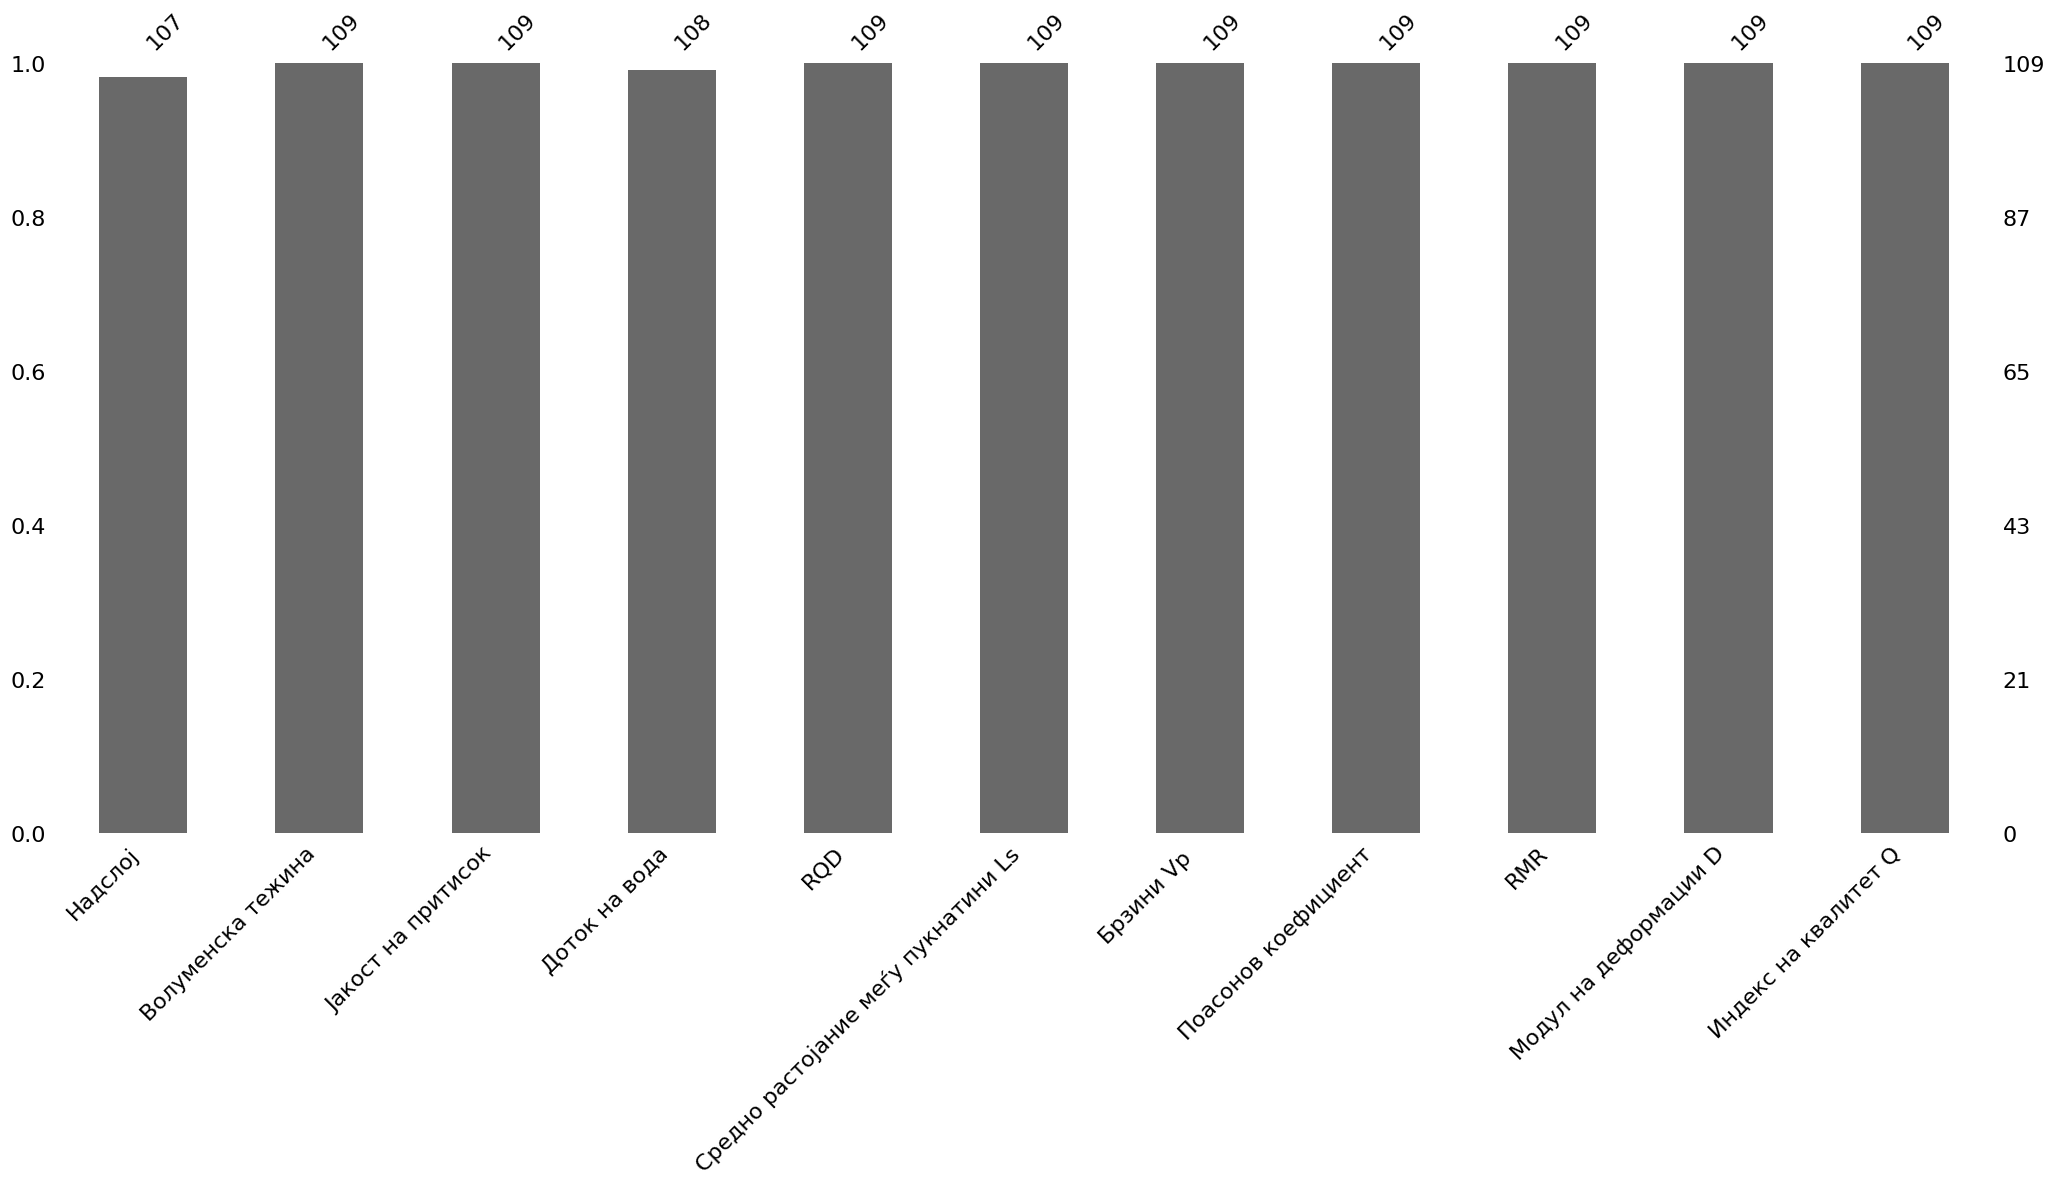

In [27]:
msno.bar(data)

<Axes: >

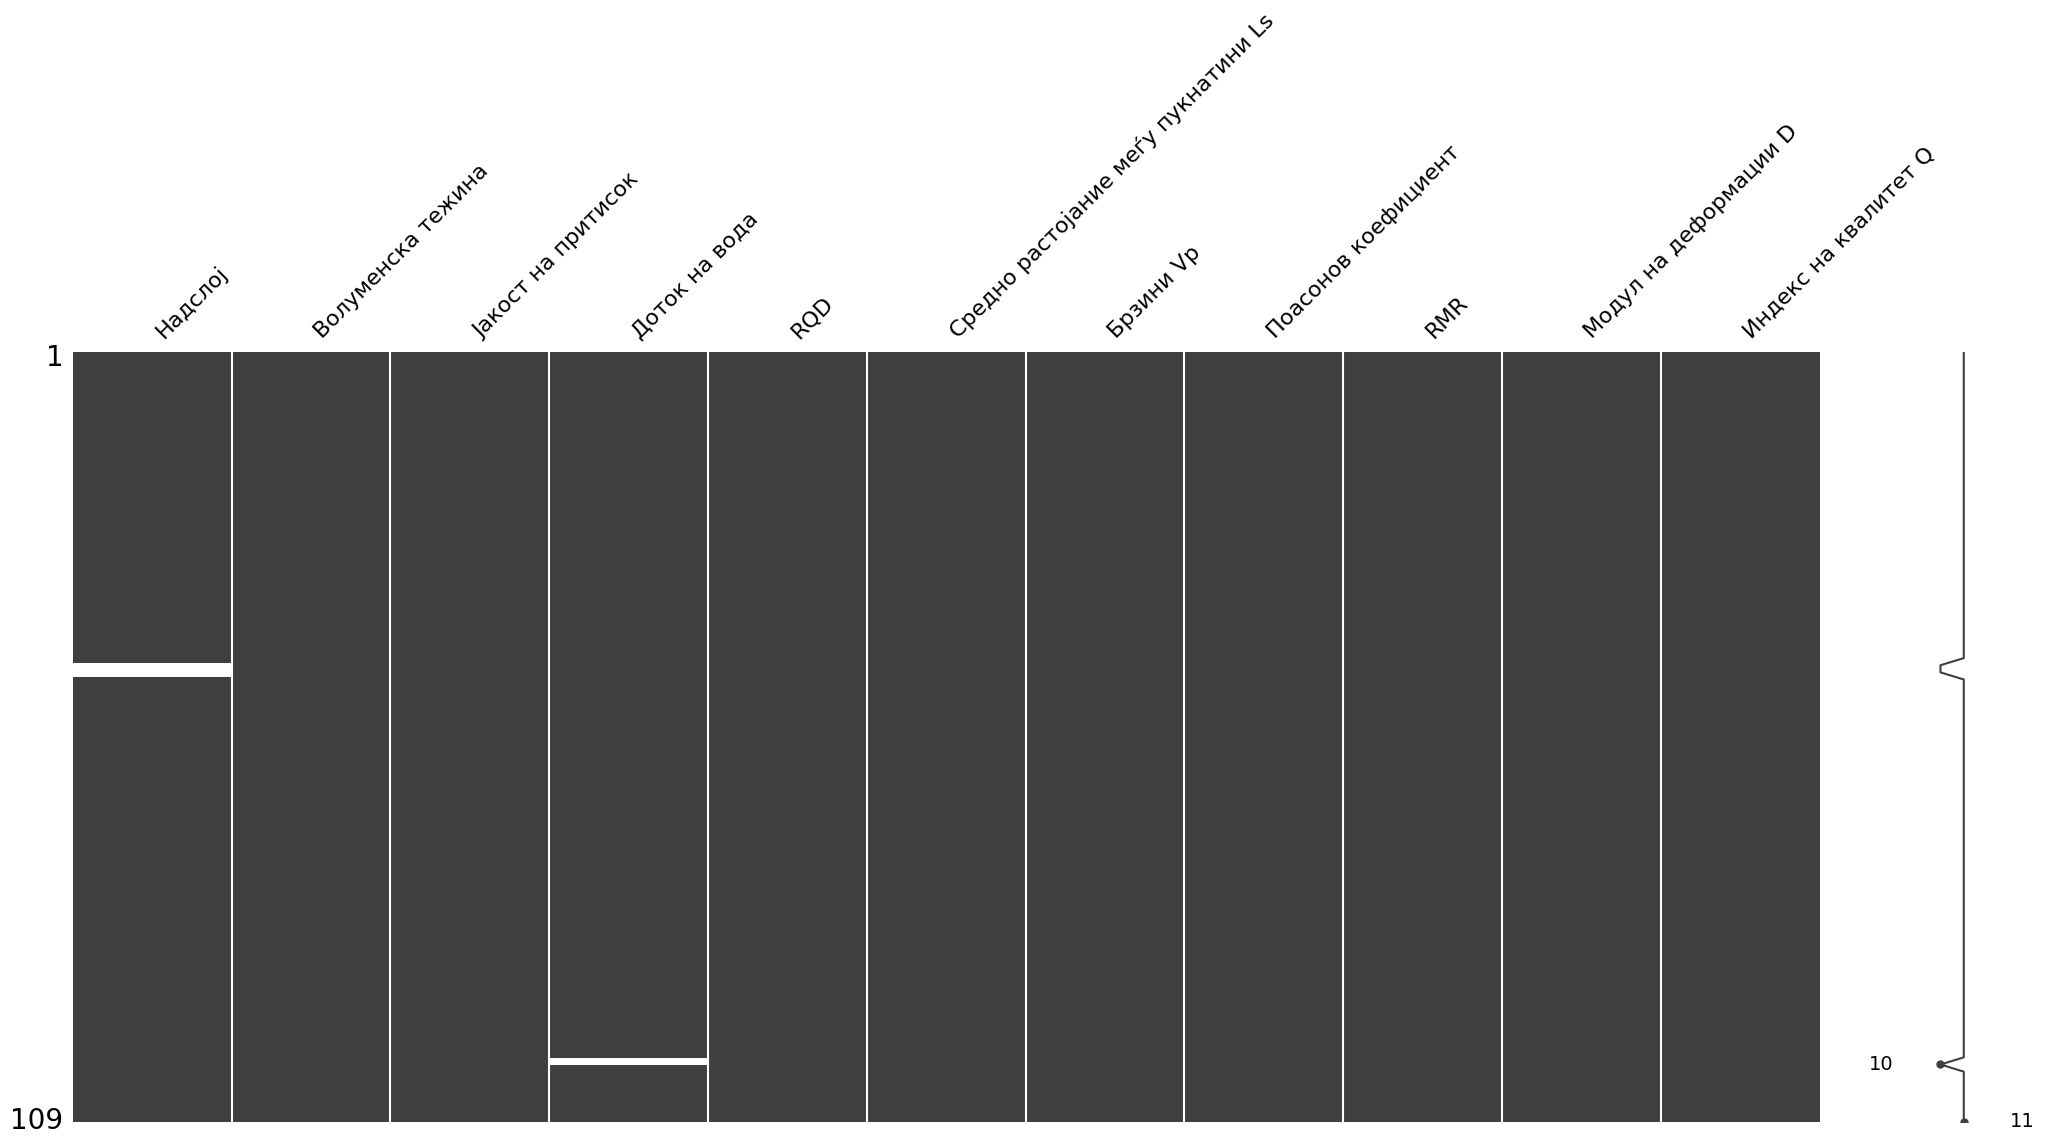

In [28]:
msno.matrix(data)

Како што може да забележиме, имаме три редици во кои што недостасуваат вредности за некои од атрибутите. Би можеле комплетно да ги отстраниме редиците, но поради малиот број на податоци, најсоодветно е да ги пополниме истите со некој imputer (КNN во нашиот случај).

In [29]:
imputer = KNNImputer(n_neighbors=5)
data.iloc[:,:] = imputer.fit_transform(data)
data

,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,RMR,Модул на деформации D,Индекс на квалитет Q
0,75.0,26.5,70.0,1.50,70.0,400.0,4450.0,0.220,72.0,11.0,8.80
1,189.0,26.5,70.0,1.50,92.0,650.0,4600.0,0.220,76.0,13.0,15.60
2,47.0,26.5,70.0,1.50,85.0,400.0,4450.0,0.220,72.0,11.0,8.80
3,199.0,26.5,70.0,1.50,70.0,700.0,4450.0,0.220,72.0,11.0,8.80
4,108.0,26.0,45.0,0.50,50.0,100.0,2000.0,0.260,38.0,2.0,0.10
...,...,...,...,...,...,...,...,...,...,...,...
104,75.0,26.9,45.0,0.40,72.0,200.0,2900.0,0.260,46.0,2.5,1.50
105,81.0,26.3,70.0,1.00,60.0,90.0,3000.0,0.260,54.0,2.2,1.10
106,164.0,26.7,42.0,0.20,65.0,120.0,2700.0,0.270,45.0,1.8,0.95
107,18.0,27.3,65.0,2.00,90.0,350.0,3600.0,0.260,62.0,3.8,3.50


In [30]:
data.isnull().sum()

Надслој                                0
Волуменска тежина                      0
Јакост на притисок                     0
Доток на вода                          0
RQD                                    0
Средно растојание меѓу пукнатини Ls    0
Брзини Vp                              0
Поасонов коефициент                    0
RMR                                    0
Модул на деформации D                  0
Индекс на квалитет Q                   0
dtype: int64

In [31]:
# Check for outliers using IQR method
def identify_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

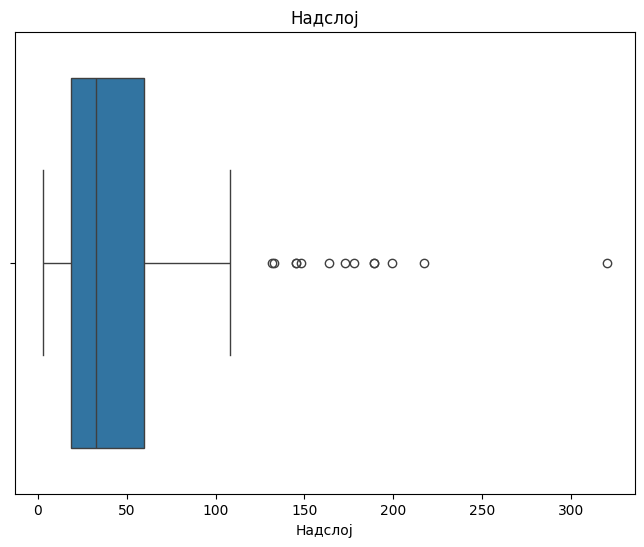

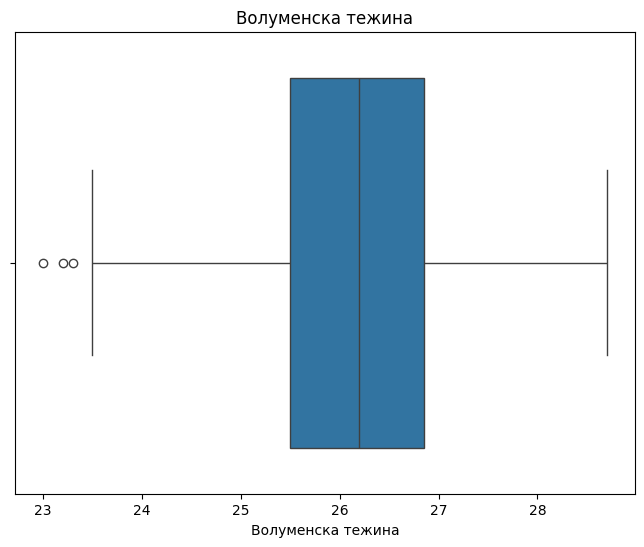

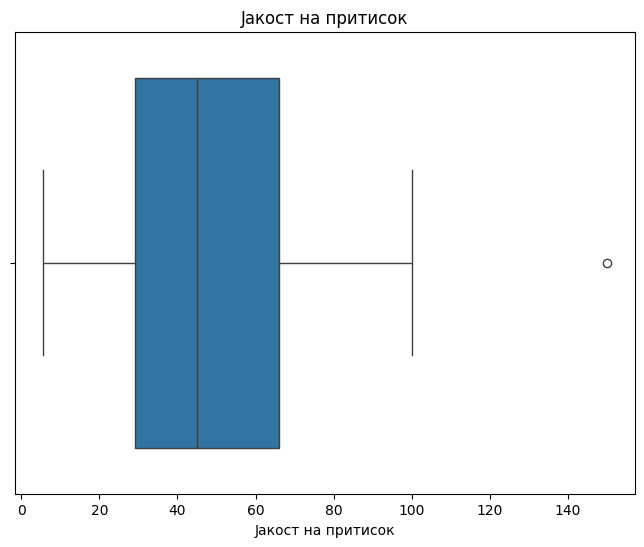

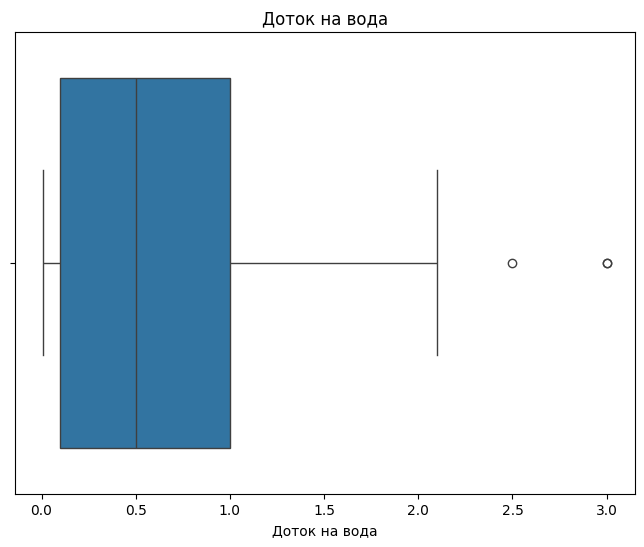

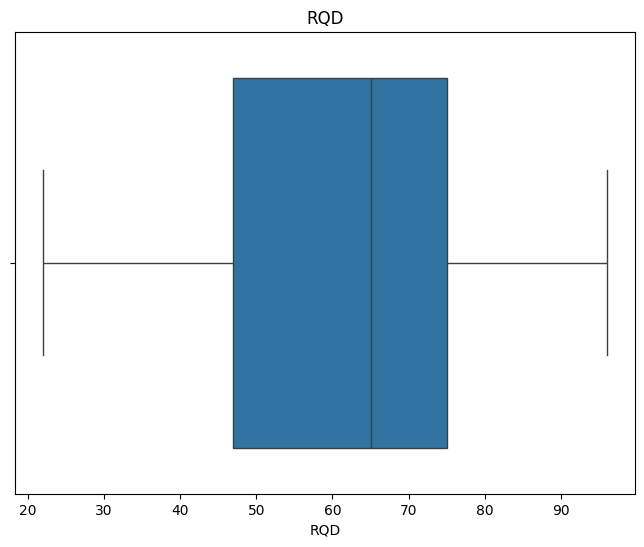

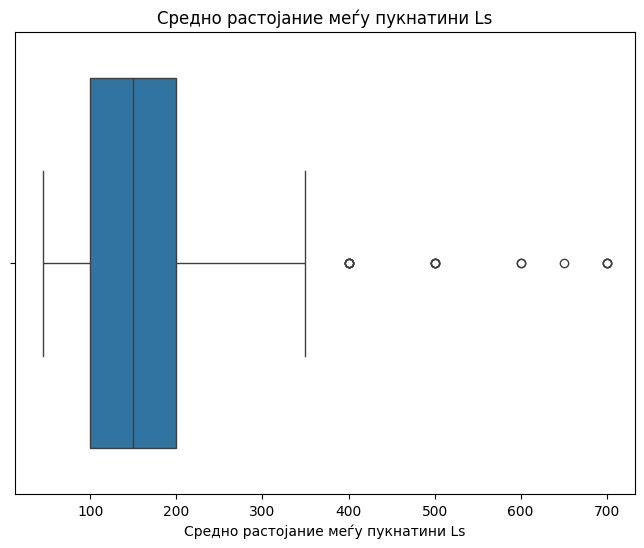

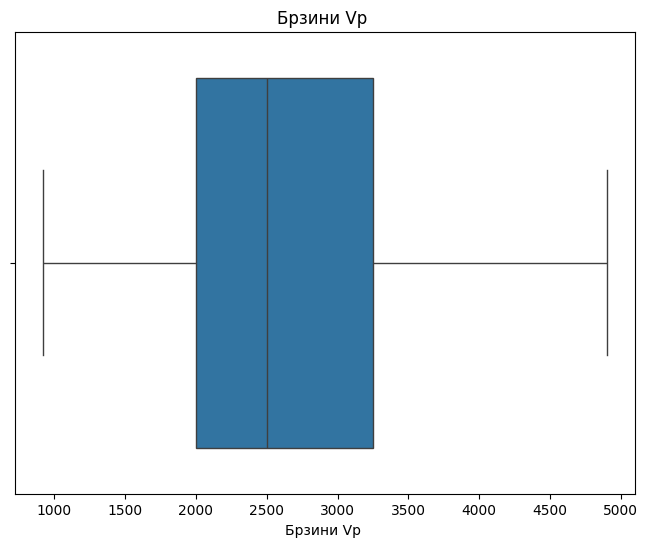

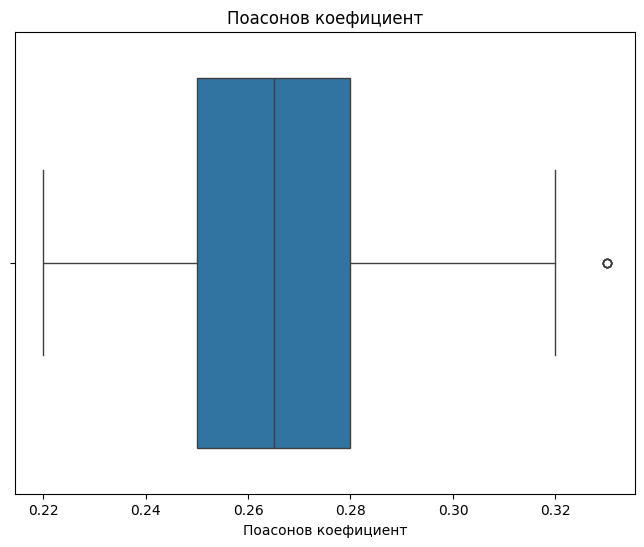

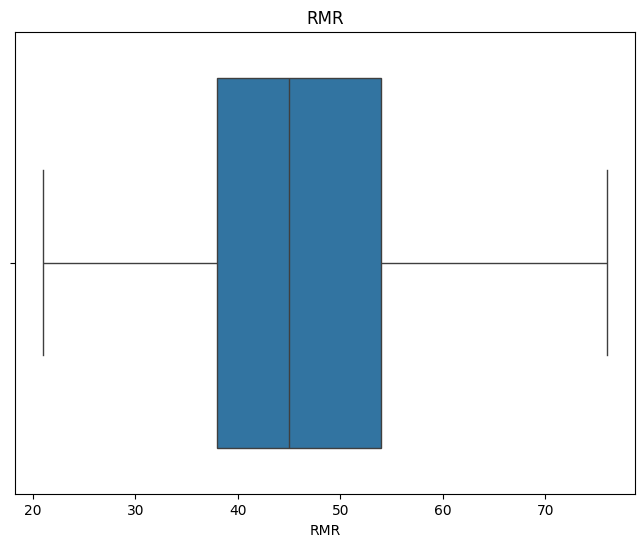

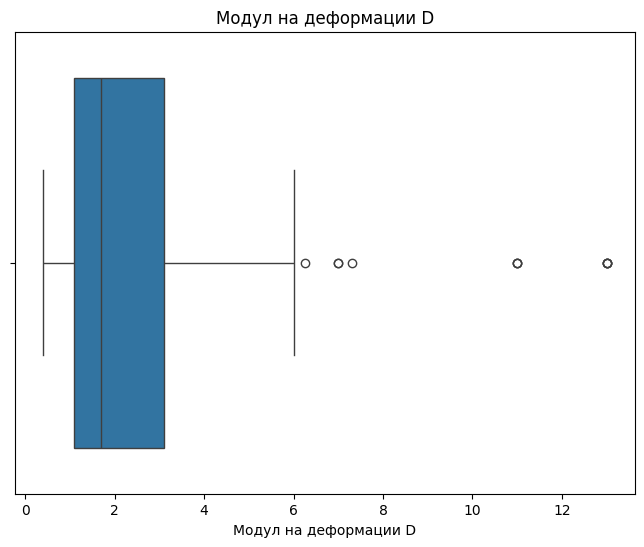

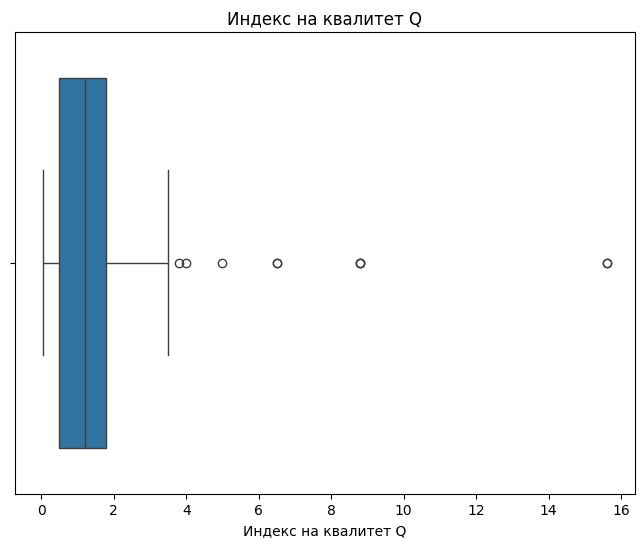

In [32]:
# Identify outliers for each column
outliers_dict = {}
for column in data.columns:
    outliers_dict[column] = identify_outliers(column)

# Visualize outliers for each column
for column, outliers in outliers_dict.items():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()

Како што може да забележиме атрибутите RQD, Брзини VP и RMR немаат воопшто outliers, додека пак сите останати имаат мал незначителен број на outliers. Доколку тие outliers прават проблем, би можеле да користиме техники за справување со нив како што се трансформација на податоците (пр. логаритамска трансформација), замена на outliers со друга вредност (средна вредност, медијана) итн.

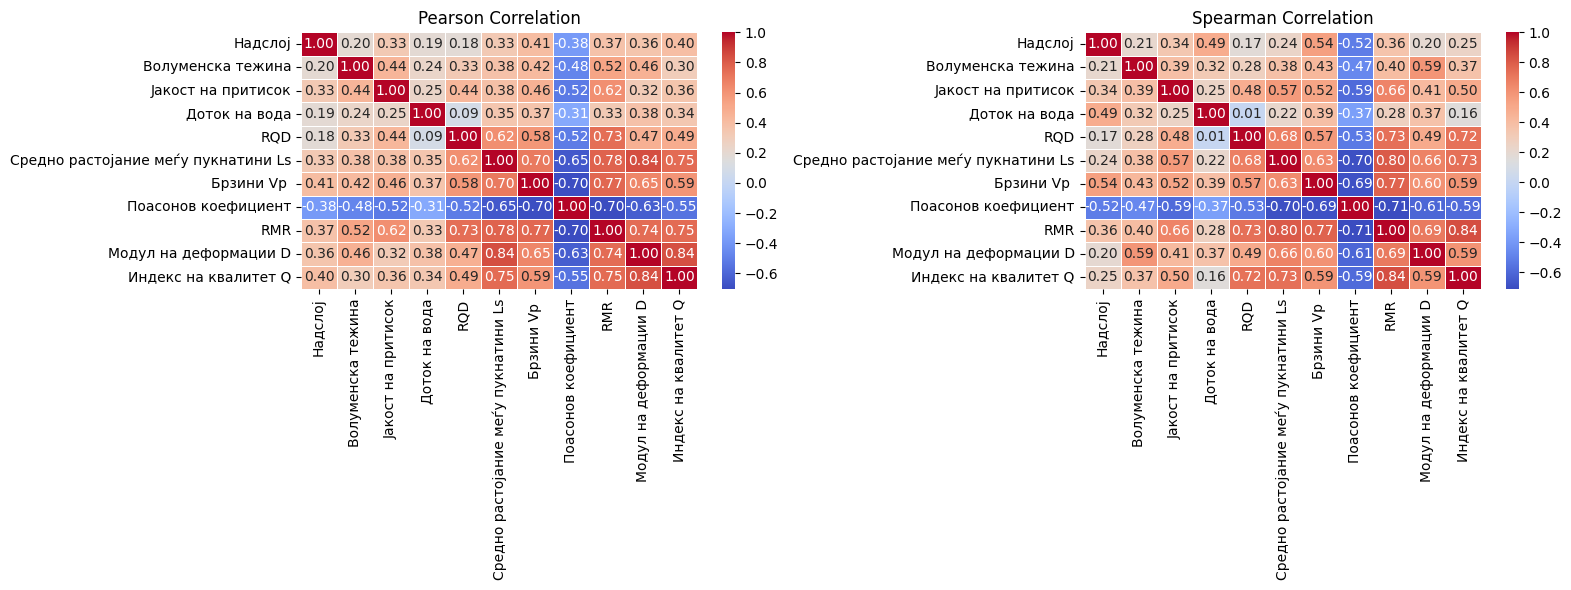

In [33]:
# Pearson correlation
pearson_corr = data.corr(method='pearson')

# Spearman correlation
spearman_corr = data.corr(method='spearman')

plt.figure(figsize=(16, 6))

# Pearson correlation heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Pearson Correlation")
plt.xticks(rotation=90)

# Spearman correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Spearman Correlation")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Од претходно направениот heatmap, би можеле ја воочиме корелацијата помеѓу атрибутите. Доколку ја одбереме вредноста 0.7 како **праг на корелација**, тогаш може да видиме дека висока меѓусебна корелација имаат:

1. **Средно растојание меѓу пукнатини Ls** и **Модул на деформации D**
2. **Модул на деформации D** и **Индекс на квалитет Q**
3. **Средно растојание меѓу пукнатини Ls** и **RMR**
4. **Брзини Vp** и **RMR**
5. **Средно растојание меѓу пукнатини Ls** и **Индекс на квалитет Q**
6. **RMR** и **Индекс на квалитет Q**
7. **RMR** и **Модул на деформации D**
8. **RMR** и **RQD**
9. **RMR** и **Поасонов коефициент**



<ipython-input-34-17555f16d49a>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  highly_correlated_features = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


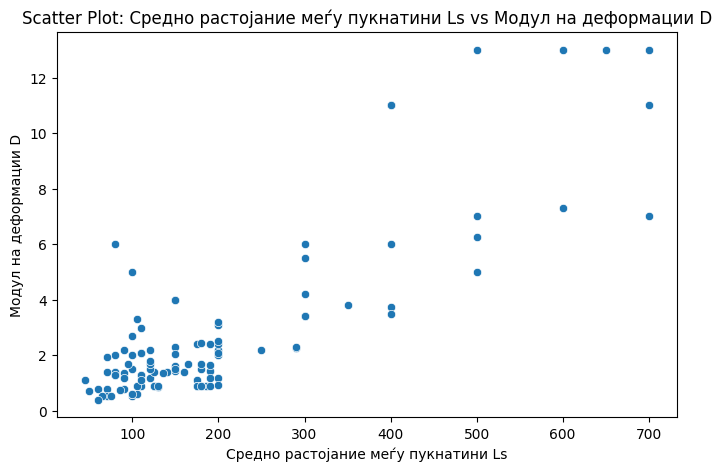

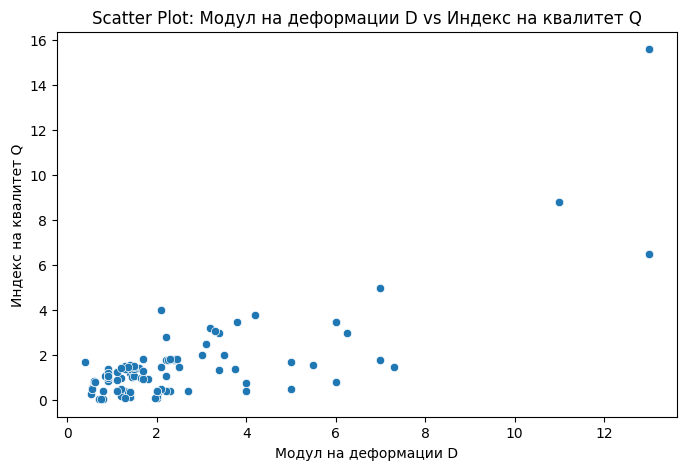

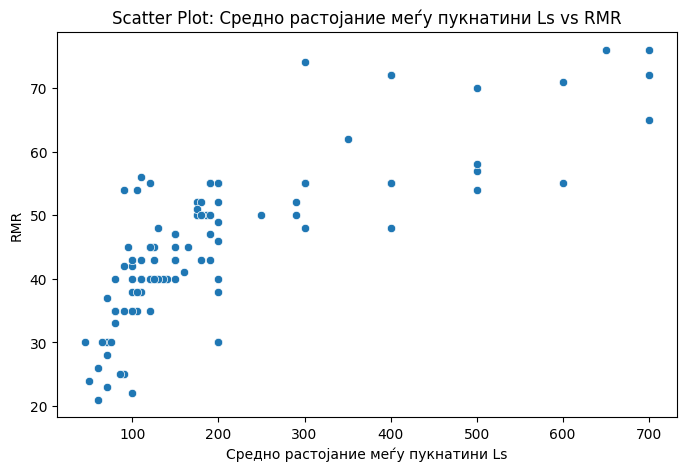

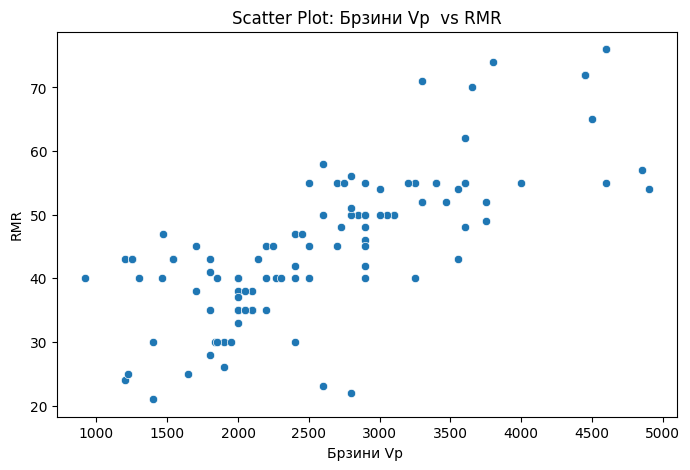

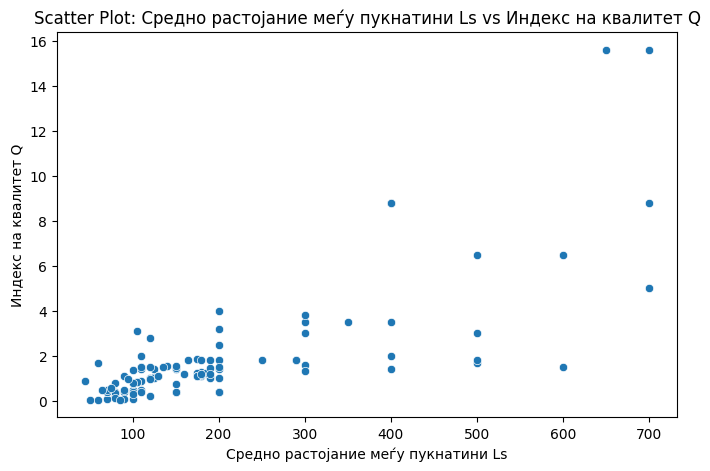

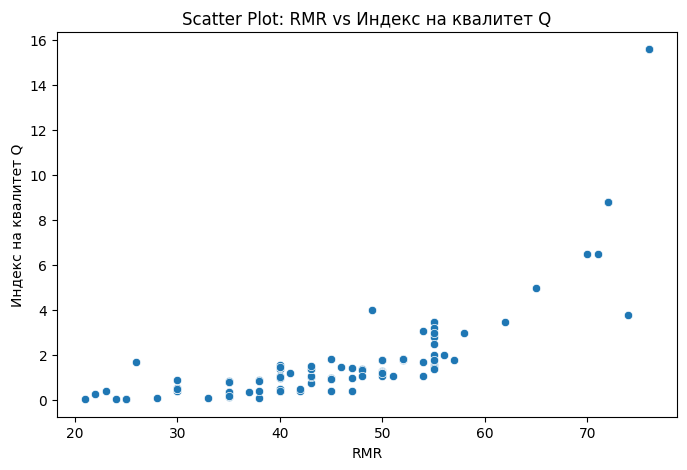

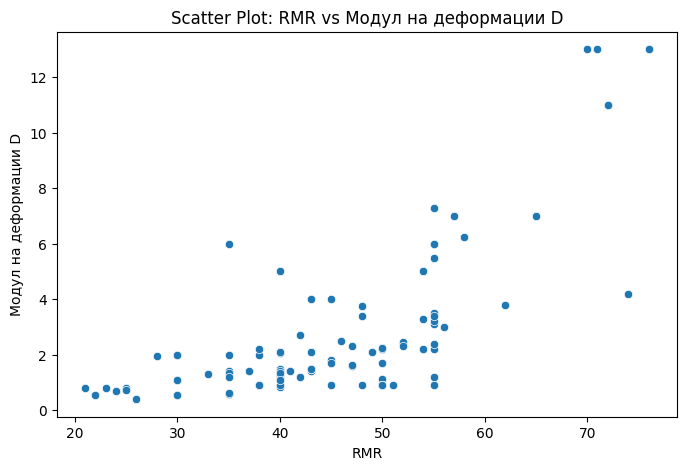

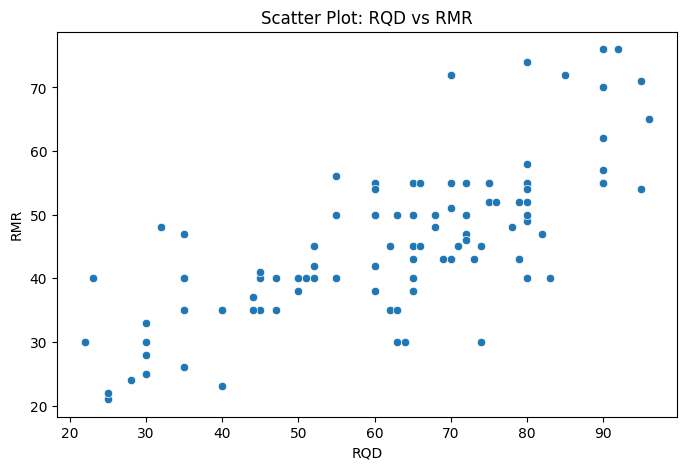

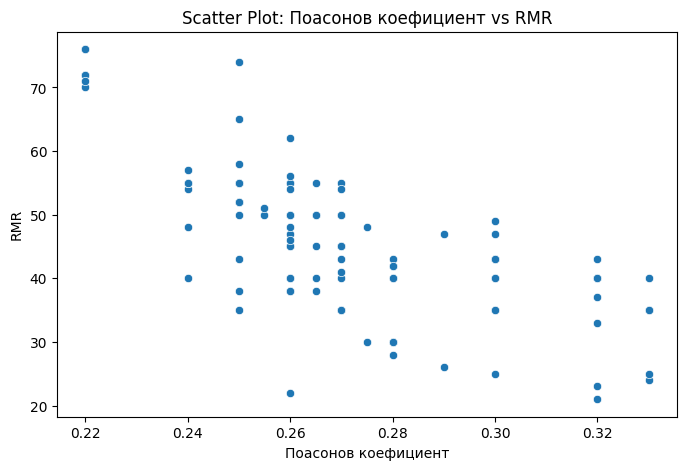

In [34]:
# Choose 0.7 as correlation threshold
correlation_threshold = 0.7

# Get highly correlated features
correlation_matrix = data.corr()
highly_correlated_features = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
                              .stack()
                              .sort_values(ascending=False)
                              .drop_duplicates())

highly_correlated_features = highly_correlated_features[abs(highly_correlated_features) > correlation_threshold]

# Visualize scatter plots for highly correlated features
for feature_pair in highly_correlated_features.index:
    feature1, feature2 = feature_pair
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=feature1, y=feature2)
    plt.title(f'Scatter Plot: {feature1} vs {feature2}')
    plt.show()

#Регресија

In [35]:
rmr_stats = {
    'Model': [],
    'Mean Squared Error':[],
    'R2 Score':[],
    'Mean Absolute Error':[],
    }

indeks_kvalitet_stats = {
    'Model': [],
    'Mean Squared Error':[],
    'R2 Score':[],
    'Mean Absolute Error':[],
    }

modul_deformacii_stats = {
    'Model': [],
    'Mean Squared Error':[],
    'R2 Score':[],
    'Mean Absolute Error':[],
    }

##Linear Regression

Linear regression models the relationship between the target variable and predictor variables as a linear equation. It assumes a linear connection and seeks to find the coefficients that minimize the difference between predicted and actual values.

In [36]:
rmr_stats['Model'].append('Linear Regression')
indeks_kvalitet_stats['Model'].append('Linear Regression')
modul_deformacii_stats['Model'].append('Linear Regression')

In [37]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

rmr_stats['Mean Squared Error'].append(mse)
rmr_stats['R2 Score'].append(r2)
rmr_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 20.15849658168764
R-squared (R2) Score: 0.8478746359994883
Mean Absolute Error (MAE):  3.3114462420569595


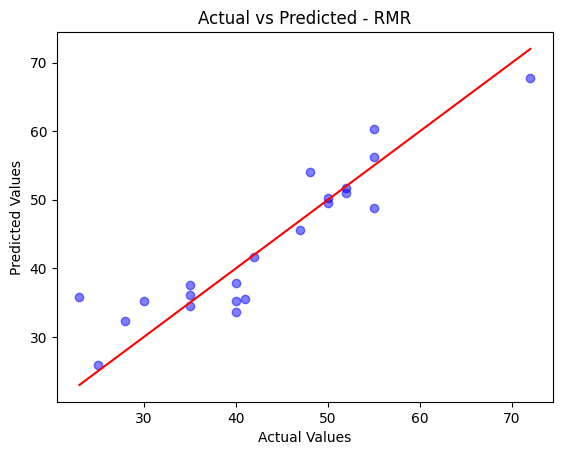

In [42]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - RMR')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

In [43]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2)

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

indeks_kvalitet_stats['Mean Squared Error'].append(mse)
indeks_kvalitet_stats['R2 Score'].append(r2)
indeks_kvalitet_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 3.9692203874223035
R-squared (R2) Score: 0.5830571716682915
Mean Absolute Error (MAE):  1.0247177194154125


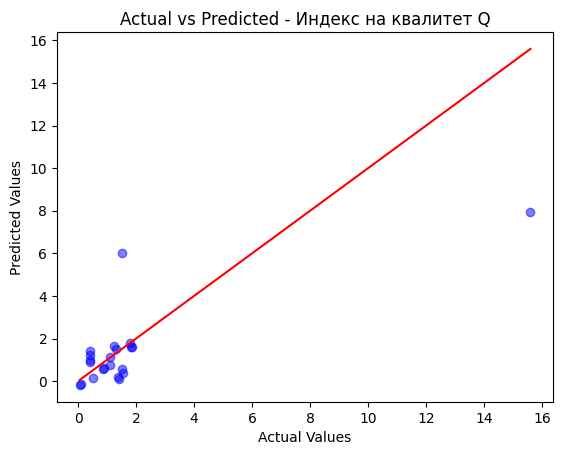

In [48]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Индекс на квалитет Q')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

In [49]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2)

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

modul_deformacii_stats['Mean Squared Error'].append(mse)
modul_deformacii_stats['R2 Score'].append(r2)
modul_deformacii_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 3.3478800605975763
R-squared (R2) Score: 0.6803530113642551
Mean Absolute Error (MAE):  1.1917321835334298


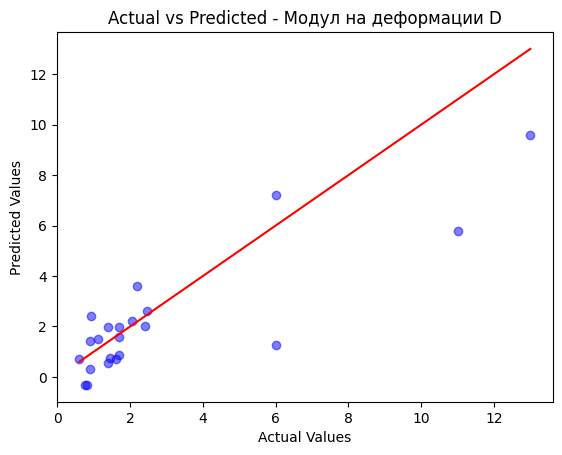

In [54]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Модул на деформации D')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

##Lasso regression

Lasso regression is an extension of linear regression that adds a regularization term. It introduces a penalty for non-essential features, encouraging the model to select a sparse set of important predictors. This helps prevent overfitting and can lead to feature selection.

In [55]:
rmr_stats['Model'].append('Lasso Regression')
indeks_kvalitet_stats['Model'].append('Lasso Regression')
modul_deformacii_stats['Model'].append('Lasso Regression')

In [56]:
# Target column - RMR
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2)

In [57]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [58]:
y_pred = lasso.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

rmr_stats['Mean Squared Error'].append(mse)
rmr_stats['R2 Score'].append(r2)
rmr_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 45.587338146966154
R-squared (R2) Score: 0.7235088324315282
Mean Absolute Error (MAE):  4.884898917175391


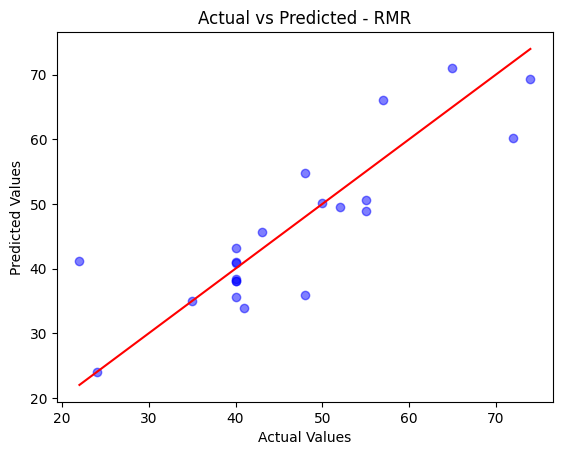

In [60]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - RMR')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

In [61]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2)

In [62]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [63]:
y_pred = lasso.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

indeks_kvalitet_stats['Mean Squared Error'].append(mse)
indeks_kvalitet_stats['R2 Score'].append(r2)
indeks_kvalitet_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 3.83036630305695
R-squared (R2) Score: 0.5944466452361414
Mean Absolute Error (MAE):  0.9692083978981899


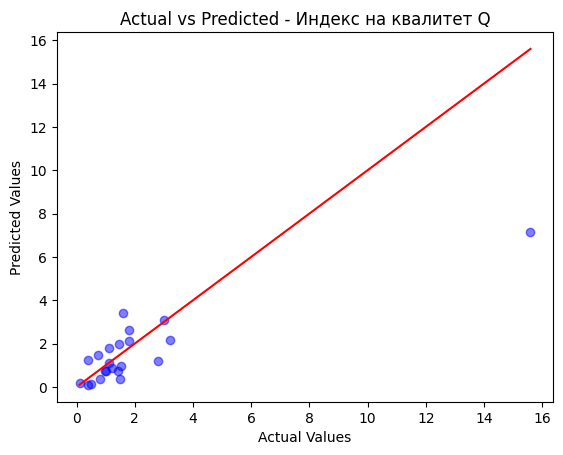

In [65]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Индекс на квалитет Q')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')


plt.show()

In [66]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2)

In [67]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [68]:
y_pred = lasso.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

modul_deformacii_stats['Mean Squared Error'].append(mse)
modul_deformacii_stats['R2 Score'].append(r2)
modul_deformacii_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 2.336201598537125
R-squared (R2) Score: 0.7816889857230624
Mean Absolute Error (MAE):  1.091499988180255


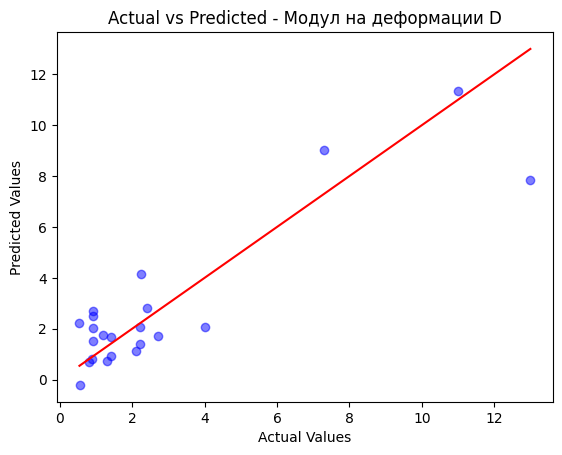

In [70]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Модул на деформации D')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

##Ridge regression

Similar to Lasso, Ridge regression is a linear regression variant with regularization. It adds a penalty term to the linear regression objective function to avoid overfitting. Ridge regression uses the L2 regularization term and is effective when dealing with multicollinearity.

In [71]:
rmr_stats['Model'].append('Ridge Regression')
indeks_kvalitet_stats['Model'].append('Ridge Regression')
modul_deformacii_stats['Model'].append('Ridge Regression')

In [72]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2)

In [73]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [74]:
y_pred = ridge.predict(X_test)

In [75]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

rmr_stats['Mean Squared Error'].append(mse)
rmr_stats['R2 Score'].append(r2)
rmr_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 57.45954229112129
R-squared (R2) Score: 0.6688447431661979
Mean Absolute Error (MAE):  5.477151042215202


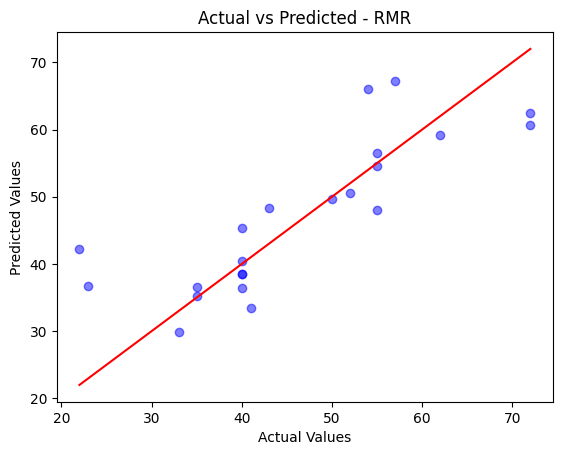

In [76]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - RMR')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

In [77]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2)

In [78]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [79]:
y_pred = ridge.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

indeks_kvalitet_stats['Mean Squared Error'].append(mse)
indeks_kvalitet_stats['R2 Score'].append(r2)
indeks_kvalitet_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 4.3076519282462975
R-squared (R2) Score: 0.5623279630869749
Mean Absolute Error (MAE):  1.2227965169359758


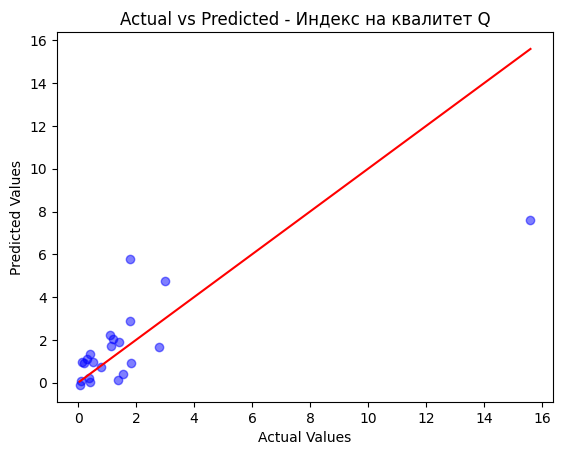

In [81]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Индекс на квалитет Q')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')


plt.show()

In [82]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2)

In [83]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [84]:
y_pred = ridge.predict(X_test)

In [85]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

modul_deformacii_stats['Mean Squared Error'].append(mse)
modul_deformacii_stats['R2 Score'].append(r2)
modul_deformacii_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 1.5642295106756408
R-squared (R2) Score: 0.8132626564455697
Mean Absolute Error (MAE):  0.9848609004769266


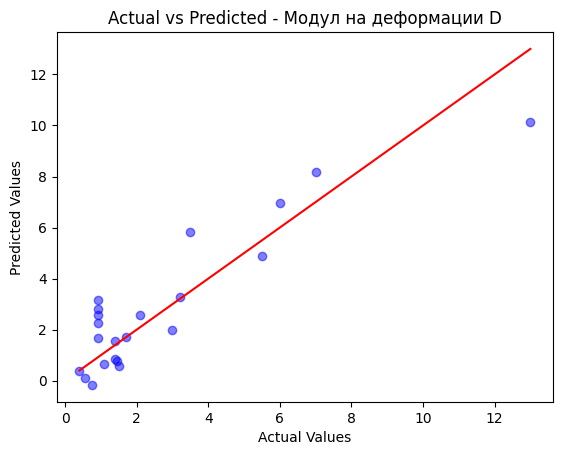

In [86]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Модул на деформации D')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

##Decision tree

A decision tree is a tree-like model where each node represents a decision based on a feature, leading to splits and branches. It recursively divides the data until a stopping criterion is met. Decision trees are intuitive, easy to understand, and capable of capturing complex relationships.

In [87]:
rmr_stats['Model'].append('Decision tree')
indeks_kvalitet_stats['Model'].append('Decision tree')
modul_deformacii_stats['Model'].append('Decision tree')

In [88]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2)

In [89]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [90]:
y_pred = regressor.predict(X_test)

In [91]:
y_pred

array([35., 48., 70., 50., 40., 40., 43., 48., 43., 54., 55., 35., 50.,
       40., 55., 43., 55., 55., 76., 50., 48., 43.])

In [92]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

rmr_stats['Mean Squared Error'].append(mse)
rmr_stats['R2 Score'].append(r2)
rmr_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 71.27272727272727
R-squared (R2) Score: 0.4627126035761011
Mean Absolute Error (MAE):  5.090909090909091


In [93]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2)

In [94]:
regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [95]:
y_pred = regressor.predict(X_test)

In [96]:
y_pred

array([ 0.905,  1.4  ,  2.2  ,  3.5  ,  2.1  ,  1.6  ,  2.7  ,  2.7  ,
        1.5  ,  0.55 ,  1.7  ,  1.2  ,  0.91 , 13.   ,  1.35 ,  0.92 ,
        0.8  ,  5.5  ,  1.3  ,  0.92 ,  0.91 ,  5.5  ])

In [97]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

modul_deformacii_stats['Mean Squared Error'].append(mse)
modul_deformacii_stats['R2 Score'].append(r2)
modul_deformacii_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 0.7441602272727272
R-squared (R2) Score: 0.8867714364531896
Mean Absolute Error (MAE):  0.608409090909091


In [98]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2)

In [99]:
regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [100]:
y_pred = regressor.predict(X_test)

In [101]:
y_pred

array([ 0.4  ,  1.25 ,  1.3  ,  0.55 ,  0.8  ,  1.405,  0.75 ,  1.3  ,
        1.82 , 15.6  ,  0.9  ,  0.8  ,  3.1  ,  8.8  ,  0.2  ,  1.1  ,
        1.1  ,  0.4  ,  1.3  ,  2.   ,  1.5  ,  0.2  ])

In [102]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

indeks_kvalitet_stats['Mean Squared Error'].append(mse)
indeks_kvalitet_stats['R2 Score'].append(r2)
indeks_kvalitet_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 1.0685738636363635
R-squared (R2) Score: 0.9070338216832737
Mean Absolute Error (MAE):  0.6015909090909091


## KNN Regression

K-nearest neighbors (KNN) regression predicts the target variable based on the average of the k-nearest data points in the feature space. It is a non-parametric algorithm that relies on proximity in the input space and is sensitive to local patterns.

In [103]:
rmr_stats['Model'].append('KNN Regression')
indeks_kvalitet_stats['Model'].append('KNN Regression')
modul_deformacii_stats['Model'].append('KNN Regression')

In [104]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2, random_state=42)

In [105]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [106]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [107]:
y_pred = knn_reg.predict(X_test)

In [108]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

rmr_stats['Mean Squared Error'].append(mse)
rmr_stats['R2 Score'].append(r2)
rmr_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 25.170909090909092
R-squared (R2) Score: 0.7986892939174117
Mean Absolute Error (MAE):  4.145454545454546


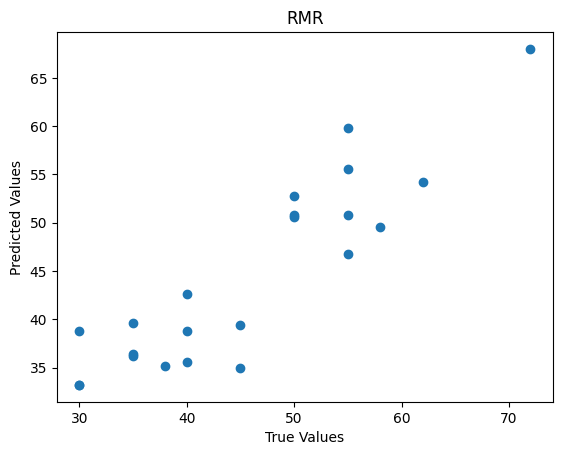

In [109]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('RMR')
plt.show()

In [110]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2, random_state=42)

In [111]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [112]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [113]:
y_pred = knn_reg.predict(X_test)

In [114]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

indeks_kvalitet_stats['Mean Squared Error'].append(mse)
indeks_kvalitet_stats['R2 Score'].append(r2)
indeks_kvalitet_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 0.7727795799999999
R-squared (R2) Score: 0.7729918031644409
Mean Absolute Error (MAE):  0.6594454545454546


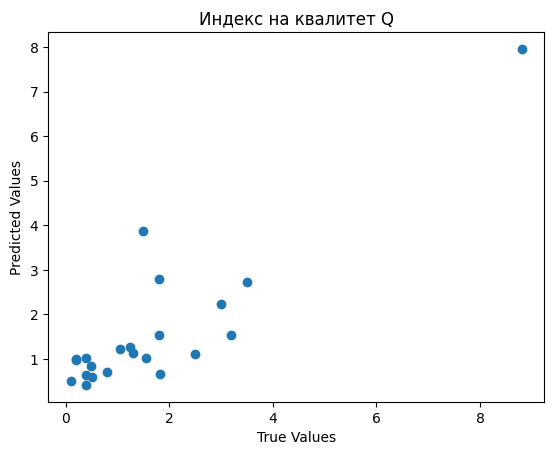

In [115]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Индекс на квалитет Q')
plt.show()

In [116]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2, random_state=42)

In [117]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [118]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [119]:
y_pred = knn_reg.predict(X_test)

In [120]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

modul_deformacii_stats['Mean Squared Error'].append(mse)
modul_deformacii_stats['R2 Score'].append(r2)
modul_deformacii_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 1.1381838636363637
R-squared (R2) Score: 0.8144596821989518
Mean Absolute Error (MAE):  0.7963181818181819


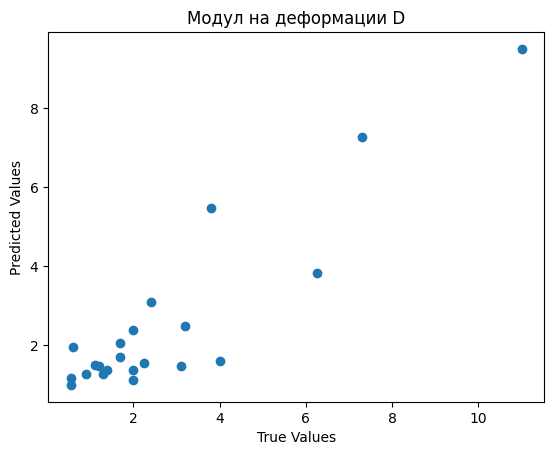

In [121]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Модул на деформации D')
plt.show()

## Random Forest

Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. It improves the model's generalization and reduces overfitting by averaging the results of individual trees. It also provides feature importance rankings.

In [122]:
rmr_stats['Model'].append('Random Forest')
indeks_kvalitet_stats['Model'].append('Random Forest')
modul_deformacii_stats['Model'].append('Random Forest')

In [123]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2, random_state=42)

In [124]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [125]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

rmr_stats['Mean Squared Error'].append(mse)
rmr_stats['R2 Score'].append(r2)
rmr_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 11.30154545454545
R-squared (R2) Score: 0.9096130343539832
Mean Absolute Error (MAE):  2.5036363636363634


In [126]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2, random_state=42)

In [127]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [128]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

indeks_kvalitet_stats['Mean Squared Error'].append(mse)
indeks_kvalitet_stats['R2 Score'].append(r2)
indeks_kvalitet_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 0.2801041506909094
R-squared (R2) Score: 0.9177178851251491
Mean Absolute Error (MAE):  0.41151636363636385


In [129]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2, random_state=42)

In [130]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [131]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

modul_deformacii_stats['Mean Squared Error'].append(mse)
modul_deformacii_stats['R2 Score'].append(r2)
modul_deformacii_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 0.5681814188636367
R-squared (R2) Score: 0.9073782677889992
Mean Absolute Error (MAE):  0.47016818181818193


## Neural network

Neural networks, or artificial neural networks, are deep learning models inspired by the human brain. They consist of layers of interconnected nodes (neurons) and can capture complex patterns. Neural networks are powerful but require sufficient data and computational resources.

In [132]:
rmr_stats['Model'].append('Neural Network')
indeks_kvalitet_stats['Model'].append('Neural Network')
modul_deformacii_stats['Model'].append('Neural Network')

In [133]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2, random_state=42)

In [134]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [135]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression, no activation function
])

In [136]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [137]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/100
3/3 - 2s - loss: 2134.4119 - val_loss: 2485.9233 - 2s/epoch - 684ms/step
Epoch 2/100
3/3 - 0s - loss: 2117.5630 - val_loss: 2467.5867 - 56ms/epoch - 19ms/step
Epoch 3/100
3/3 - 0s - loss: 2100.2366 - val_loss: 2449.9180 - 56ms/epoch - 19ms/step
Epoch 4/100
3/3 - 0s - loss: 2084.6897 - val_loss: 2431.7815 - 52ms/epoch - 17ms/step
Epoch 5/100
3/3 - 0s - loss: 2067.0479 - val_loss: 2412.6411 - 249ms/epoch - 83ms/step
Epoch 6/100
3/3 - 0s - loss: 2049.9785 - val_loss: 2392.2471 - 136ms/epoch - 45ms/step
Epoch 7/100
3/3 - 0s - loss: 2030.7600 - val_loss: 2371.2131 - 73ms/epoch - 24ms/step
Epoch 8/100
3/3 - 0s - loss: 2011.0260 - val_loss: 2348.9524 - 80ms/epoch - 27ms/step
Epoch 9/100
3/3 - 0s - loss: 1990.1123 - val_loss: 2324.7483 - 50ms/epoch - 17ms/step
Epoch 10/100
3/3 - 0s - loss: 1967.7042 - val_loss: 2298.9585 - 51ms/epoch - 17ms/step
Epoch 11/100
3/3 - 0s - loss: 1943.4001 - val_loss: 2272.1614 - 75ms/epoch - 25ms/step
Epoch 12/100
3/3 - 0s - loss: 1918.4899 - val_loss:

In [138]:
y_pred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 177ms/step


In [139]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

rmr_stats['Mean Squared Error'].append(mse)
rmr_stats['R2 Score'].append(r2)
rmr_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 66.34506200376133
R-squared (R2) Score: 0.46938860138770133
Mean Absolute Error (MAE):  6.3258819580078125


In [140]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2)

In [141]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression, no activation function
])

In [143]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [144]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/100
3/3 - 2s - loss: 11.6620 - val_loss: 18.9164 - 2s/epoch - 517ms/step
Epoch 2/100
3/3 - 0s - loss: 10.9440 - val_loss: 17.8935 - 118ms/epoch - 39ms/step
Epoch 3/100
3/3 - 0s - loss: 10.2106 - val_loss: 16.9280 - 114ms/epoch - 38ms/step
Epoch 4/100
3/3 - 0s - loss: 9.5555 - val_loss: 16.0003 - 51ms/epoch - 17ms/step
Epoch 5/100
3/3 - 0s - loss: 8.8683 - val_loss: 15.0728 - 74ms/epoch - 25ms/step
Epoch 6/100
3/3 - 0s - loss: 8.3441 - val_loss: 14.1593 - 68ms/epoch - 23ms/step
Epoch 7/100
3/3 - 0s - loss: 7.7277 - val_loss: 13.3557 - 86ms/epoch - 29ms/step
Epoch 8/100
3/3 - 0s - loss: 7.2059 - val_loss: 12.6053 - 160ms/epoch - 53ms/step
Epoch 9/100
3/3 - 0s - loss: 6.7046 - val_loss: 11.8784 - 76ms/epoch - 25ms/step
Epoch 10/100
3/3 - 0s - loss: 6.1817 - val_loss: 11.1651 - 136ms/epoch - 45ms/step
Epoch 11/100
3/3 - 0s - loss: 5.7831 - val_loss: 10.4012 - 84ms/epoch - 28ms/step
Epoch 12/100
3/3 - 0s - loss: 5.3284 - val_loss: 9.6138 - 47ms/epoch - 16ms/step
Epoch 13/100
3/3 - 0

In [145]:
y_pred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 191ms/step


In [146]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

modul_deformacii_stats['Mean Squared Error'].append(mse)
modul_deformacii_stats['R2 Score'].append(r2)
modul_deformacii_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 2.493913491390823
R-squared (R2) Score: 0.7431676512538314
Mean Absolute Error (MAE):  1.1346254693378102


In [147]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2)

In [148]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression, no activation function
])

In [150]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [151]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/100
3/3 - 2s - loss: 14.7406 - val_loss: 2.0104 - 2s/epoch - 747ms/step
Epoch 2/100
3/3 - 0s - loss: 13.9220 - val_loss: 1.7727 - 113ms/epoch - 38ms/step
Epoch 3/100
3/3 - 0s - loss: 13.1265 - val_loss: 1.5907 - 111ms/epoch - 37ms/step
Epoch 4/100
3/3 - 0s - loss: 12.5232 - val_loss: 1.4432 - 109ms/epoch - 36ms/step
Epoch 5/100
3/3 - 0s - loss: 11.9174 - val_loss: 1.3138 - 83ms/epoch - 28ms/step
Epoch 6/100
3/3 - 0s - loss: 11.4150 - val_loss: 1.1819 - 65ms/epoch - 22ms/step
Epoch 7/100
3/3 - 0s - loss: 10.8265 - val_loss: 1.0601 - 77ms/epoch - 26ms/step
Epoch 8/100
3/3 - 0s - loss: 10.4165 - val_loss: 0.9381 - 47ms/epoch - 16ms/step
Epoch 9/100
3/3 - 0s - loss: 9.8788 - val_loss: 0.8201 - 67ms/epoch - 22ms/step
Epoch 10/100
3/3 - 0s - loss: 9.3821 - val_loss: 0.7108 - 53ms/epoch - 18ms/step
Epoch 11/100
3/3 - 0s - loss: 8.8541 - val_loss: 0.6080 - 105ms/epoch - 35ms/step
Epoch 12/100
3/3 - 0s - loss: 8.2667 - val_loss: 0.5088 - 57ms/epoch - 19ms/step
Epoch 13/100
3/3 - 0s - lo

In [152]:
y_pred = model.predict(X_test_scaled)

1/1 [==============================] - 0s 55ms/step


In [153]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

indeks_kvalitet_stats['Mean Squared Error'].append(mse)
indeks_kvalitet_stats['R2 Score'].append(r2)
indeks_kvalitet_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 1.0237067237923418
R-squared (R2) Score: 0.6968721736974579
Mean Absolute Error (MAE):  0.6676847109577874


## XGBoost

XGBoost (Extreme Gradient Boosting) is a gradient boosting algorithm known for its efficiency and high performance. It builds a series of weak learners sequentially and corrects errors made by previous models. XGBoost is widely used for structured/tabular data and is known for its speed and accuracy.

In [154]:
rmr_stats['Model'].append('XGBoost')
indeks_kvalitet_stats['Model'].append('XGBoost')
modul_deformacii_stats['Model'].append('XGBoost')

In [155]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2, random_state=42)

In [156]:
model = xgb.XGBRegressor(objective='reg:squarederror',
                          colsample_bytree=0.8,
                          learning_rate=0.1,
                          max_depth=5,
                          alpha=10,
                          n_estimators=100)


In [157]:
model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [158]:
y_pred = model.predict(X_test)

In [159]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

rmr_stats['Mean Squared Error'].append(mse)
rmr_stats['R2 Score'].append(r2)
rmr_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 16.437721178525614
R-squared (R2) Score: 0.8685351711022292
Mean Absolute Error (MAE):  3.009087996049361


In [160]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2)

In [161]:
model = xgb.XGBRegressor(objective='reg:squarederror',
                          colsample_bytree=0.8,
                          learning_rate=0.1,
                          max_depth=5,
                          alpha=10,
                          n_estimators=100)


In [162]:
model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [163]:
y_pred = model.predict(X_test)

In [164]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

modul_deformacii_stats['Mean Squared Error'].append(mse)
modul_deformacii_stats['R2 Score'].append(r2)
modul_deformacii_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 2.801756126473951
R-squared (R2) Score: 0.6209577603629123
Mean Absolute Error (MAE):  1.0901871956478466


In [165]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2)

In [166]:
model = xgb.XGBRegressor(objective='reg:squarederror',
                          colsample_bytree=0.8,
                          learning_rate=0.1,
                          max_depth=5,
                          alpha=10,
                          n_estimators=100)


In [167]:
model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [168]:
y_pred = model.predict(X_test)

In [169]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

indeks_kvalitet_stats['Mean Squared Error'].append(mse)
indeks_kvalitet_stats['R2 Score'].append(r2)
indeks_kvalitet_stats['Mean Absolute Error'].append(mae)

Mean Squared Error (MSE): 3.0499892571672986
R-squared (R2) Score: 0.7585539429582381
Mean Absolute Error (MAE):  0.8355822425538844


## Summary

In [170]:
pd.DataFrame(rmr_stats)

,Model,Mean Squared Error,R2 Score,Mean Absolute Error
0,Linear Regression,20.158497,0.847875,3.311446
1,Lasso Regression,45.587338,0.723509,4.884899
2,Ridge Regression,57.459542,0.668845,5.477151
3,Decision tree,71.272727,0.462713,5.090909
4,KNN Regression,25.170909,0.798689,4.145455
5,Random Forest,11.301545,0.909613,2.503636
6,Neural Network,66.345062,0.469389,6.325882
7,XGBoost,16.437721,0.868535,3.009088


Моделот кој се истакна во предвидувањето на RMR со најголема точност е Random Forest. Постигна најниска средна квадратна грешка (Mean Squared Error), највисок R2 резултат (R2 score) и најниска просечна апсолутна грешка (Mean Absolute Error).

In [171]:
pd.DataFrame(modul_deformacii_stats)

,Model,Mean Squared Error,R2 Score,Mean Absolute Error
0,Linear Regression,3.347880,0.680353,1.191732
1,Lasso Regression,2.336202,0.781689,1.091500
2,Ridge Regression,1.564230,0.813263,0.984861
3,Decision tree,0.744160,0.886771,0.608409
4,KNN Regression,1.138184,0.814460,0.796318
5,Random Forest,0.568181,0.907378,0.470168
6,Neural Network,2.493913,0.743168,1.134625
7,XGBoost,2.801756,0.620958,1.090187


Моделот кој се истакна во предвидувањето на Модул на деформации со најголема точност е Random Forest. Постигна најниска средна квадратна грешка (Mean Squared Error), највисок R2 резултат (R2 score) и најниска просечна апсолутна грешка (Mean Absolute Error).

In [172]:
pd.DataFrame(indeks_kvalitet_stats)

,Model,Mean Squared Error,R2 Score,Mean Absolute Error
0,Linear Regression,3.969220,0.583057,1.024718
1,Lasso Regression,3.830366,0.594447,0.969208
2,Ridge Regression,4.307652,0.562328,1.222797
3,Decision tree,1.068574,0.907034,0.601591
4,KNN Regression,0.772780,0.772992,0.659445
5,Random Forest,0.280104,0.917718,0.411516
6,Neural Network,1.023707,0.696872,0.667685
7,XGBoost,3.049989,0.758554,0.835582


Моделот кој се истакна во предвидувањето на Индекс на квалитет со најголема точност е Random Forest. Постигна најниска средна квадратна грешка (Mean Squared Error), највисок R2 резултат (R2 score) и најниска просечна апсолутна грешка (Mean Absolute Error).

#### **Накратко, Random Forest е модел со најдобри перформанси во сите три таргет колони (RMR, индекс на квалитет Q, модул на деформации D)**

#Класификација

## Дискретизација на таргет колони и визуелизација на категориски променливи

In [173]:
def discretize_RMR(x):
    if x <= 20:
        return '5 категорија'
    elif x <= 40:
        return '4 категорија'
    elif x <= 60:
        return '3 категорија'
    elif x <= 80:
        return '2 категорија'
    else:
        return '1 категорија'

In [174]:
def discretize_quality_index(x):
    if x >= 0.001 and x < 0.01:
       return  "особено лоша карпа (G)"
    elif x >= 0.01 and x < 0.1:
       return "екстремно лоша карпа (F)"
    elif x >= 0.1 and x < 1:
        return "многу лоша карпа (E)"
    elif x >= 1 and x < 4:
        return "лоша карпа (D)"
    elif x >= 4 and x < 10:
        return  "поволна карпа (C)"
    elif x >= 10 and x < 40:
        return "добра карпа (B)"
    elif x >= 40 and x < 100:
        return "многу добра карпа (A)"
    elif x >= 100 and x < 400:
        return "екстремно добра карпа (A)"
    elif x >= 400 and x <= 1000:
        return "особено добра карпа (A)"

In [175]:
def discretize_MD(x):
    if x >= 0.01 and x <1:
       return  "мали деформации"
    elif x >= 1 and x < 5:
       return "прифатливи/нормални деформации"
    elif x >= 5 and x < 10:
        return "големи деформации"
    elif x >10:
        return "екстремни деформации"

In [176]:
data2 = data.copy()
data2['RMR'] = data2['RMR'].apply(discretize_RMR)
data2["Индекс на квалитет Q"] = data2["Индекс на квалитет Q"].apply(discretize_quality_index)
data2["Модул на деформации D"] = data2["Модул на деформации D"].apply(discretize_MD)
data2

,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,RMR,Модул на деформации D,Индекс на квалитет Q
0,75.0,26.5,70.0,1.50,70.0,400.0,4450.0,0.220,2 категорија,екстремни деформации,поволна карпа (C)
1,189.0,26.5,70.0,1.50,92.0,650.0,4600.0,0.220,2 категорија,екстремни деформации,добра карпа (B)
2,47.0,26.5,70.0,1.50,85.0,400.0,4450.0,0.220,2 категорија,екстремни деформации,поволна карпа (C)
3,199.0,26.5,70.0,1.50,70.0,700.0,4450.0,0.220,2 категорија,екстремни деформации,поволна карпа (C)
4,108.0,26.0,45.0,0.50,50.0,100.0,2000.0,0.260,4 категорија,прифатливи/нормални деформации,многу лоша карпа (E)
...,...,...,...,...,...,...,...,...,...,...,...
104,75.0,26.9,45.0,0.40,72.0,200.0,2900.0,0.260,3 категорија,прифатливи/нормални деформации,лоша карпа (D)
105,81.0,26.3,70.0,1.00,60.0,90.0,3000.0,0.260,3 категорија,прифатливи/нормални деформации,лоша карпа (D)
106,164.0,26.7,42.0,0.20,65.0,120.0,2700.0,0.270,3 категорија,прифатливи/нормални деформации,многу лоша карпа (E)
107,18.0,27.3,65.0,2.00,90.0,350.0,3600.0,0.260,2 категорија,прифатливи/нормални деформации,лоша карпа (D)


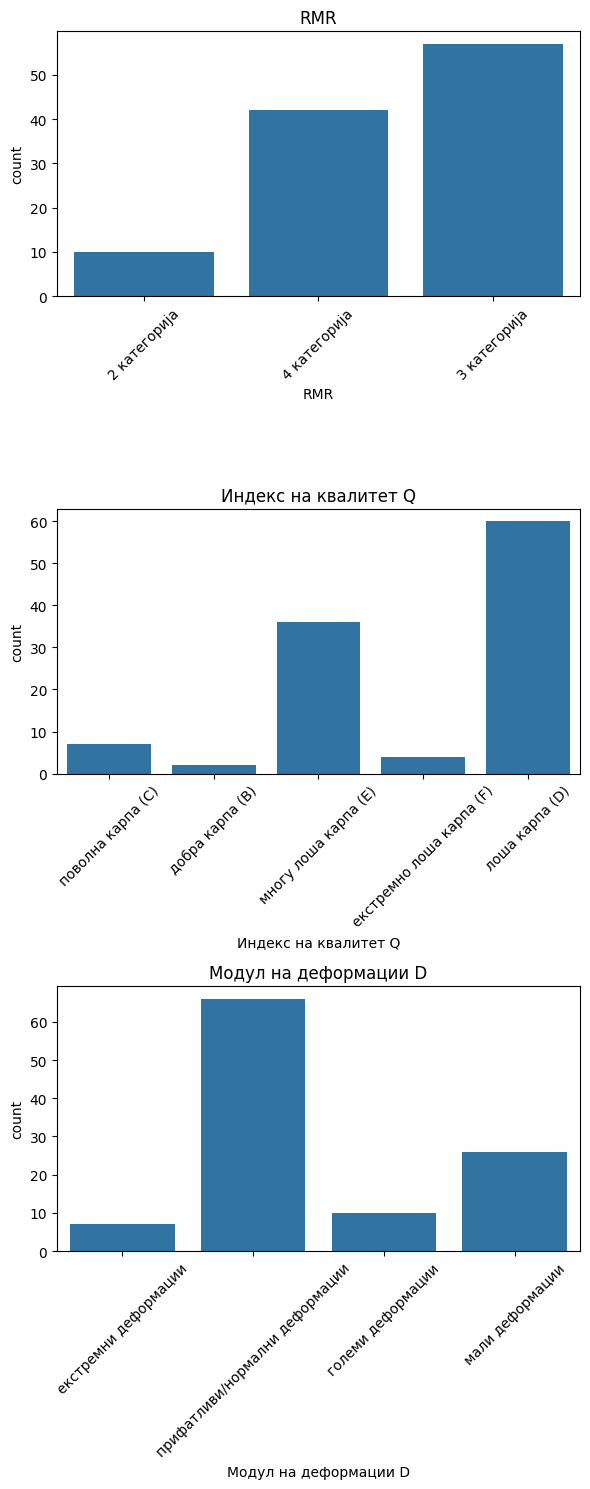

In [177]:
categorical_columns = ['RMR', 'Индекс на квалитет Q', 'Модул на деформации D']

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(6, 15))

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data2, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

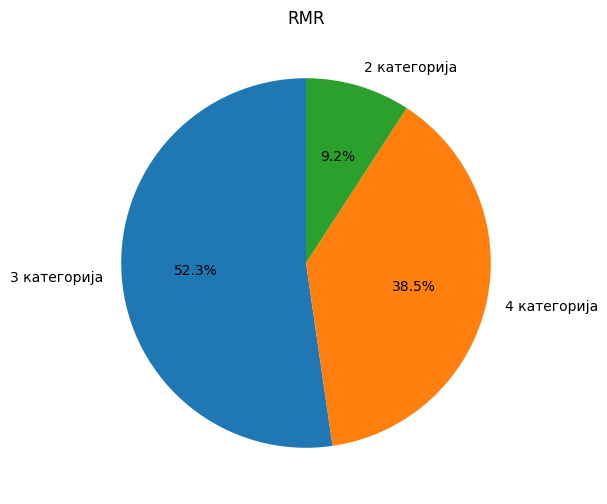

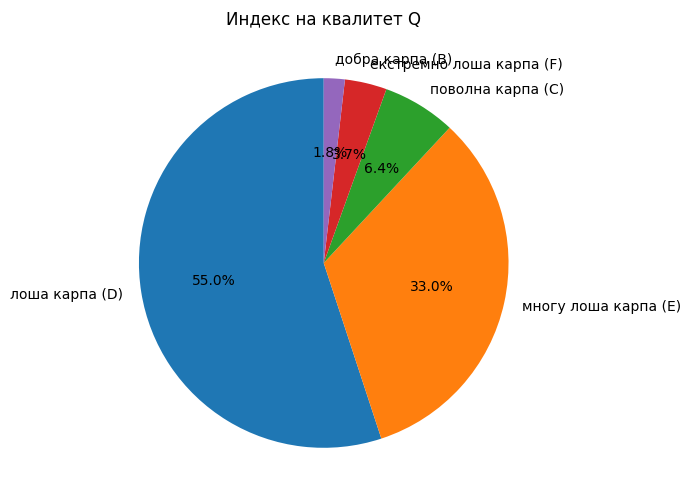

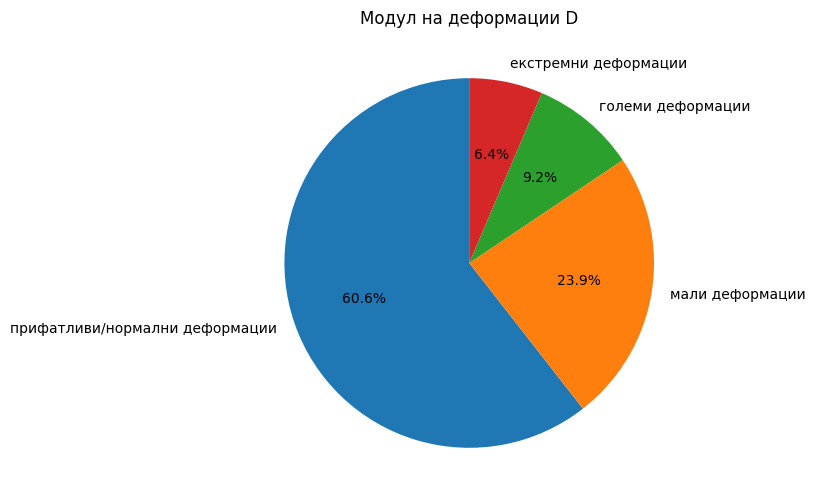

In [178]:
categorical_columns = ['RMR', 'Индекс на квалитет Q', 'Модул на деформации D']

for column in categorical_columns:
    counts = data2[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(column)
    plt.show()

In [179]:
rmr_stats = {
    'Model': [],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1 Score':[],
    }

indeks_kvalitet_stats = {
    'Model': [],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1 Score':[],
    }

modul_deformacii_stats = {
    'Model': [],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1 Score':[],
    }

## Decision tree

Decision Trees are versatile and interpretable models that recursively split the data based on features, creating a tree-like structure. They are effective for both classification and regression tasks, capturing complex decision boundaries.

In [180]:
rmr_stats['Model'].append('Decision tree')
indeks_kvalitet_stats['Model'].append('Decision tree')
modul_deformacii_stats['Model'].append('Decision tree')

In [181]:
encoder = LabelEncoder()

data2['RMR'] = encoder.fit_transform(data2['RMR'])
data2['Модул на деформации D'] = encoder.fit_transform(data2['Модул на деформации D'])
data2['Индекс на квалитет Q'] = encoder.fit_transform(data2['Индекс на квалитет Q'])
data2

,Надслој,Волуменска тежина,Јакост на притисок,Доток на вода,RQD,Средно растојание меѓу пукнатини Ls,Брзини Vp,Поасонов коефициент,RMR,Модул на деформации D,Индекс на квалитет Q
0,75.0,26.5,70.0,1.50,70.0,400.0,4450.0,0.220,0,1,4
1,189.0,26.5,70.0,1.50,92.0,650.0,4600.0,0.220,0,1,0
2,47.0,26.5,70.0,1.50,85.0,400.0,4450.0,0.220,0,1,4
3,199.0,26.5,70.0,1.50,70.0,700.0,4450.0,0.220,0,1,4
4,108.0,26.0,45.0,0.50,50.0,100.0,2000.0,0.260,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...
104,75.0,26.9,45.0,0.40,72.0,200.0,2900.0,0.260,1,3,2
105,81.0,26.3,70.0,1.00,60.0,90.0,3000.0,0.260,1,3,2
106,164.0,26.7,42.0,0.20,65.0,120.0,2700.0,0.270,1,3,3
107,18.0,27.3,65.0,2.00,90.0,350.0,3600.0,0.260,0,3,2


In [182]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['RMR'], test_size=0.2)

In [183]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [184]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2])

In [185]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [186]:
rmr_stats['Accuracy'].append(accuracy)
rmr_stats['Precision'].append(precision)
rmr_stats['Recall'].append(recall)
rmr_stats['F1 Score'].append(f1)

In [187]:
rmr_stats

{'Model': ['Decision tree'],
 'Accuracy': [0.8181818181818182],
 'Precision': [0.8272727272727273],
 'Recall': [0.8181818181818182],
 'F1 Score': [0.8172248803827752]}

In [188]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Модул на деформации D'], test_size=0.2)

In [189]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [190]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 3, 3, 3, 0, 1, 0, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3])

In [191]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [192]:
modul_deformacii_stats['Accuracy'].append(accuracy)
modul_deformacii_stats['Precision'].append(precision)
modul_deformacii_stats['Recall'].append(recall)
modul_deformacii_stats['F1 Score'].append(f1)

In [193]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Индекс на квалитет Q'], test_size=0.2)

In [194]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [195]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 3, 2, 4, 3, 2, 2, 3, 4, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3])

In [196]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [197]:
indeks_kvalitet_stats['Accuracy'].append(accuracy)
indeks_kvalitet_stats['Precision'].append(precision)
indeks_kvalitet_stats['Recall'].append(recall)
indeks_kvalitet_stats['F1 Score'].append(f1)

## Naive Bayes

Naive Bayes is a probabilistic classifier based on Bayes' theorem with an assumption of independence between features. Despite its simplicity, it performs well in various classification tasks, especially with text data.

In [198]:
rmr_stats['Model'].append('Naive Bayes')
indeks_kvalitet_stats['Model'].append('Naive Bayes')
modul_deformacii_stats['Model'].append('Naive Bayes')

In [199]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['RMR'], test_size=0.2)

In [200]:
gnb = GaussianNB()

In [201]:
gnb.fit(X_train, y_train)

GaussianNB()

In [202]:
y_pred = gnb.predict(X_test)

In [203]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [204]:
rmr_stats['Accuracy'].append(accuracy)
rmr_stats['Precision'].append(precision)
rmr_stats['Recall'].append(recall)
rmr_stats['F1 Score'].append(f1)

In [205]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Модул на деформации D'], test_size=0.2)

In [206]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [207]:
y_pred = gnb.predict(X_test)

In [208]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
modul_deformacii_stats['Accuracy'].append(accuracy)
modul_deformacii_stats['Precision'].append(precision)
modul_deformacii_stats['Recall'].append(recall)
modul_deformacii_stats['F1 Score'].append(f1)

In [210]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Индекс на квалитет Q'], test_size=0.2)

In [211]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [212]:
y_pred = gnb.predict(X_test)

In [213]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [214]:
indeks_kvalitet_stats['Accuracy'].append(accuracy)
indeks_kvalitet_stats['Precision'].append(precision)
indeks_kvalitet_stats['Recall'].append(recall)
indeks_kvalitet_stats['F1 Score'].append(f1)

## KNN classification

KNN is a non-parametric algorithm that classifies instances based on the majority class of their k-nearest neighbors. It's particularly intuitive and works well for datasets with clear clusters.

In [215]:
rmr_stats['Model'].append('KNN')
indeks_kvalitet_stats['Model'].append('KNN')
modul_deformacii_stats['Model'].append('KNN')

In [216]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['RMR'], test_size=0.2, random_state=42)

In [217]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [218]:
y_pred = knn.predict(X_test)

In [219]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [220]:
rmr_stats['Accuracy'].append(accuracy)
rmr_stats['Precision'].append(precision)
rmr_stats['Recall'].append(recall)
rmr_stats['F1 Score'].append(f1)

In [221]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Модул на деформации D'], test_size=0.2, random_state=42)

In [222]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [223]:
y_pred = knn.predict(X_test)

In [224]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
modul_deformacii_stats['Accuracy'].append(accuracy)
modul_deformacii_stats['Precision'].append(precision)
modul_deformacii_stats['Recall'].append(recall)
modul_deformacii_stats['F1 Score'].append(f1)

In [226]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Индекс на квалитет Q'], test_size=0.2, random_state=42)

In [227]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [228]:
y_pred = knn.predict(X_test)

In [229]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [230]:
indeks_kvalitet_stats['Accuracy'].append(accuracy)
indeks_kvalitet_stats['Precision'].append(precision)
indeks_kvalitet_stats['Recall'].append(recall)
indeks_kvalitet_stats['F1 Score'].append(f1)

## Logistic regression

Logistic Regression is a linear model commonly used for binary classification problems. It estimates the probability of an instance belonging to a particular class and makes predictions based on a threshold.

In [231]:
rmr_stats['Model'].append('Logistic regression')
indeks_kvalitet_stats['Model'].append('Logistic regression')
modul_deformacii_stats['Model'].append('Logistic regression')

In [232]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['RMR'], test_size=0.2, random_state=42)

In [233]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [234]:
y_pred = logmodel.predict(X_test)

In [235]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [236]:
rmr_stats['Accuracy'].append(accuracy)
rmr_stats['Precision'].append(precision)
rmr_stats['Recall'].append(recall)
rmr_stats['F1 Score'].append(f1)

In [237]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Модул на деформации D'], test_size=0.2, random_state=42)

In [238]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [239]:
y_pred = logmodel.predict(X_test)

In [240]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [241]:
modul_deformacii_stats['Accuracy'].append(accuracy)
modul_deformacii_stats['Precision'].append(precision)
modul_deformacii_stats['Recall'].append(recall)
modul_deformacii_stats['F1 Score'].append(f1)

In [242]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Индекс на квалитет Q'], test_size=0.2)

In [243]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [244]:
y_pred = logmodel.predict(X_test)

In [245]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [246]:
indeks_kvalitet_stats['Accuracy'].append(accuracy)
indeks_kvalitet_stats['Precision'].append(precision)
indeks_kvalitet_stats['Recall'].append(recall)
indeks_kvalitet_stats['F1 Score'].append(f1)

## Random Forest

Random Forest is an ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and generalization. It is robust, handles overfitting, and provides feature importance insights.

In [247]:
rmr_stats['Model'].append('Random Forest')
indeks_kvalitet_stats['Model'].append('Random Forest')
modul_deformacii_stats['Model'].append('Random Forest')

In [248]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['RMR'], test_size=0.2, random_state=42)

In [249]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [250]:
y_pred = rf_classifier.predict(X_test)

In [251]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [252]:
rmr_stats['Accuracy'].append(accuracy)
rmr_stats['Precision'].append(precision)
rmr_stats['Recall'].append(recall)
rmr_stats['F1 Score'].append(f1)

In [253]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Модул на деформации D'], test_size=0.2, random_state=42)

In [254]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [255]:
y_pred = rf_classifier.predict(X_test)

In [256]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [257]:
modul_deformacii_stats['Accuracy'].append(accuracy)
modul_deformacii_stats['Precision'].append(precision)
modul_deformacii_stats['Recall'].append(recall)
modul_deformacii_stats['F1 Score'].append(f1)

In [258]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Индекс на квалитет Q'], test_size=0.2)

In [259]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [260]:
y_pred = rf_classifier.predict(X_test)

In [261]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [262]:
indeks_kvalitet_stats['Accuracy'].append(accuracy)
indeks_kvalitet_stats['Precision'].append(precision)
indeks_kvalitet_stats['Recall'].append(recall)
indeks_kvalitet_stats['F1 Score'].append(f1)

## Support Vector Machines


SVM is a powerful algorithm for both linear and non-linear classification. It finds the optimal hyperplane that maximizes the margin between different classes, making it effective in high-dimensional spaces.

In [263]:
from sklearn.svm import SVC
rmr_stats['Model'].append('Support Vector Machines ')
indeks_kvalitet_stats['Model'].append('Support Vector Machines ')
modul_deformacii_stats['Model'].append('Support Vector Machines ')

In [264]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['RMR'], test_size=0.2, random_state=42)

In [265]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [266]:
y_pred = svm_classifier.predict(X_test)

In [267]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [268]:
rmr_stats['Accuracy'].append(accuracy)
rmr_stats['Precision'].append(precision)
rmr_stats['Recall'].append(recall)
rmr_stats['F1 Score'].append(f1)

In [269]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Модул на деформации D'], test_size=0.2, random_state=42)

In [270]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [271]:
y_pred = svm_classifier.predict(X_test)

In [272]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [273]:
modul_deformacii_stats['Accuracy'].append(accuracy)
modul_deformacii_stats['Precision'].append(precision)
modul_deformacii_stats['Recall'].append(recall)
modul_deformacii_stats['F1 Score'].append(f1)

In [274]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Индекс на квалитет Q'], test_size=0.2)

In [275]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [276]:
y_pred = svm_classifier.predict(X_test)

In [277]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [278]:
indeks_kvalitet_stats['Accuracy'].append(accuracy)
indeks_kvalitet_stats['Precision'].append(precision)
indeks_kvalitet_stats['Recall'].append(recall)
indeks_kvalitet_stats['F1 Score'].append(f1)

## XGBoost

XGBoost (Extreme Gradient Boosting) is an ensemble learning method that combines the strengths of boosting and gradient boosting algorithms. It's known for its speed, efficiency, and high predictive accuracy.

In [279]:
rmr_stats['Model'].append('XGBoost')
indeks_kvalitet_stats['Model'].append('XGBoost')
modul_deformacii_stats['Model'].append('XGBoost')

In [280]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['RMR'], test_size=0.2, random_state=42)

In [281]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [282]:
y_pred = xgb_classifier.predict(X_test)

In [283]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [284]:
rmr_stats['Accuracy'].append(accuracy)
rmr_stats['Precision'].append(precision)
rmr_stats['Recall'].append(recall)
rmr_stats['F1 Score'].append(f1)

In [285]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Модул на деформации D'], test_size=0.2, random_state=42)

In [286]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [287]:
y_pred = xgb_classifier.predict(X_test)

In [288]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [289]:
modul_deformacii_stats['Accuracy'].append(accuracy)
modul_deformacii_stats['Precision'].append(precision)
modul_deformacii_stats['Recall'].append(recall)
modul_deformacii_stats['F1 Score'].append(f1)

In [290]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data2.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data2['Индекс на квалитет Q'], test_size=0.2)

In [291]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [292]:
y_pred = xgb_classifier.predict(X_test)

In [293]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
indeks_kvalitet_stats['Accuracy'].append(accuracy)
indeks_kvalitet_stats['Precision'].append(precision)
indeks_kvalitet_stats['Recall'].append(recall)
indeks_kvalitet_stats['F1 Score'].append(f1)

## Summary

In [295]:
pd.DataFrame(rmr_stats)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.818182,0.827273,0.818182,0.817225
1,Naive Bayes,0.818182,0.845902,0.818182,0.825758
2,KNN,0.727273,0.747475,0.727273,0.726113
3,Logistic regression,0.681818,0.780303,0.681818,0.701791
4,Random Forest,0.909091,0.924242,0.909091,0.904451
5,Support Vector Machines,0.818182,0.870130,0.818182,0.813725
6,XGBoost,0.863636,0.895105,0.863636,0.859903


Моделот Random Forest покажува извонредни перформанси со најголема точност, прецизност, повлекување и F1 резултат меѓу сите модели. Постигнува точност од 90,91%, што го прави најсоодветен за предвидување RMR.

In [296]:
pd.DataFrame(modul_deformacii_stats)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.636364,0.650974,0.636364,0.642238
1,Naive Bayes,0.636364,0.659091,0.636364,0.646853
2,KNN,0.636364,0.572193,0.636364,0.602273
3,Logistic regression,0.681818,0.538278,0.681818,0.601604
4,Random Forest,0.863636,0.869318,0.863636,0.858260
5,Support Vector Machines,0.818182,0.819073,0.818182,0.806548
6,XGBoost,0.772727,0.811688,0.772727,0.779415


Слично на RMR, моделот Random Forest се истакнува во предвидувањето на модулот на деформации. Со точност од 86,36%, тој ги надминува другите модели, обезбедувајќи добар баланс на прецизност, recall и F1 score.

In [297]:
pd.DataFrame(indeks_kvalitet_stats)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.727273,0.727273,0.727273,0.727273
1,Naive Bayes,0.909091,0.936869,0.909091,0.913871
2,KNN,0.863636,0.890909,0.863636,0.857576
3,Logistic regression,0.681818,0.656566,0.681818,0.665507
4,Random Forest,0.818182,0.837879,0.818182,0.821290
5,Support Vector Machines,0.636364,0.597403,0.636364,0.604167
6,XGBoost,0.772727,0.760173,0.772727,0.761486


Исто и тука, моделот Random Forest се истакнува во предвидувањето на модулот на деформации. Со точност од 86,36%, тој ги надминува другите модели.


#### **Накратко, Random Forest се покажува повторно како модел со најдобри перформанси, како за регресија, така и за класификација.**

# Кластерирање


## K-Means clustering

K-Means is a popular centroid-based clustering algorithm aiming to partition data into K clusters. It iteratively refines cluster assignments by minimizing the sum of squared distances between data points and their cluster centers. Efficient and scalable, K-Means is suitable for well-defined, spherical clusters. However, it assumes equal-sized clusters and is sensitive to initial centroid placement.

In [298]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

In [299]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [300]:
kmeans.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'warn',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'n_features_in_': 2,
 '_tol': 43.08586290517954,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[ 234.590529  ,  -27.50318869],
        [1471.61588867,   31.31064611],
        [-835.85361684,   11.25363836]]),
 '_n_features_out': 3,
 'labels_': array([1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1,
        0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0,
        0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0],
       dtype=int32),
 'inertia_': 15408801.65679627,
 'n_iter_': 4}

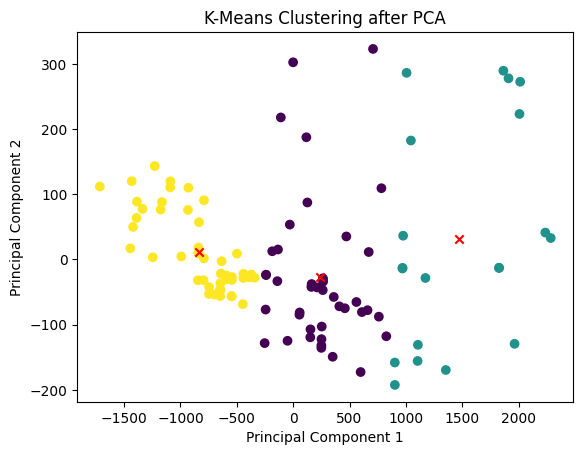

In [301]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering after PCA')
plt.show()

Како што може да забележиме од визуелизацијата на кластерите, K-Means не ги кластерира толку добро, одредени податоци припаѓаат на погрешен кластер.

## Hierarchical clustering (Agglomerative)

Hierarchical Clustering builds a tree of clusters, linking similar data points into progressively larger clusters. The agglomerative approach starts with individual points and merges them hierarchically. Dendrograms visually represent the merging process. This method is flexible, allowing the selection of clusters at different levels, but can be computationally expensive for large datasets.

In [302]:
features = ['RMR', 'Индекс на квалитет Q']
d = data[features].values

In [303]:
num_clusters = 2
ac = AgglomerativeClustering(n_clusters=num_clusters)
labels = ac.fit_predict(d)

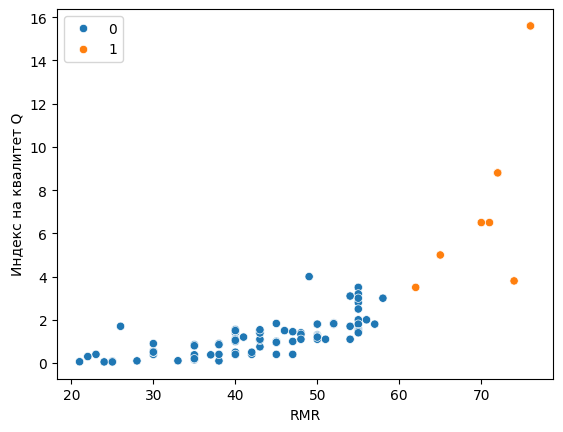

In [304]:
sns.scatterplot(x=data['RMR'], y=data['Индекс на квалитет Q'], hue=labels)
plt.show()

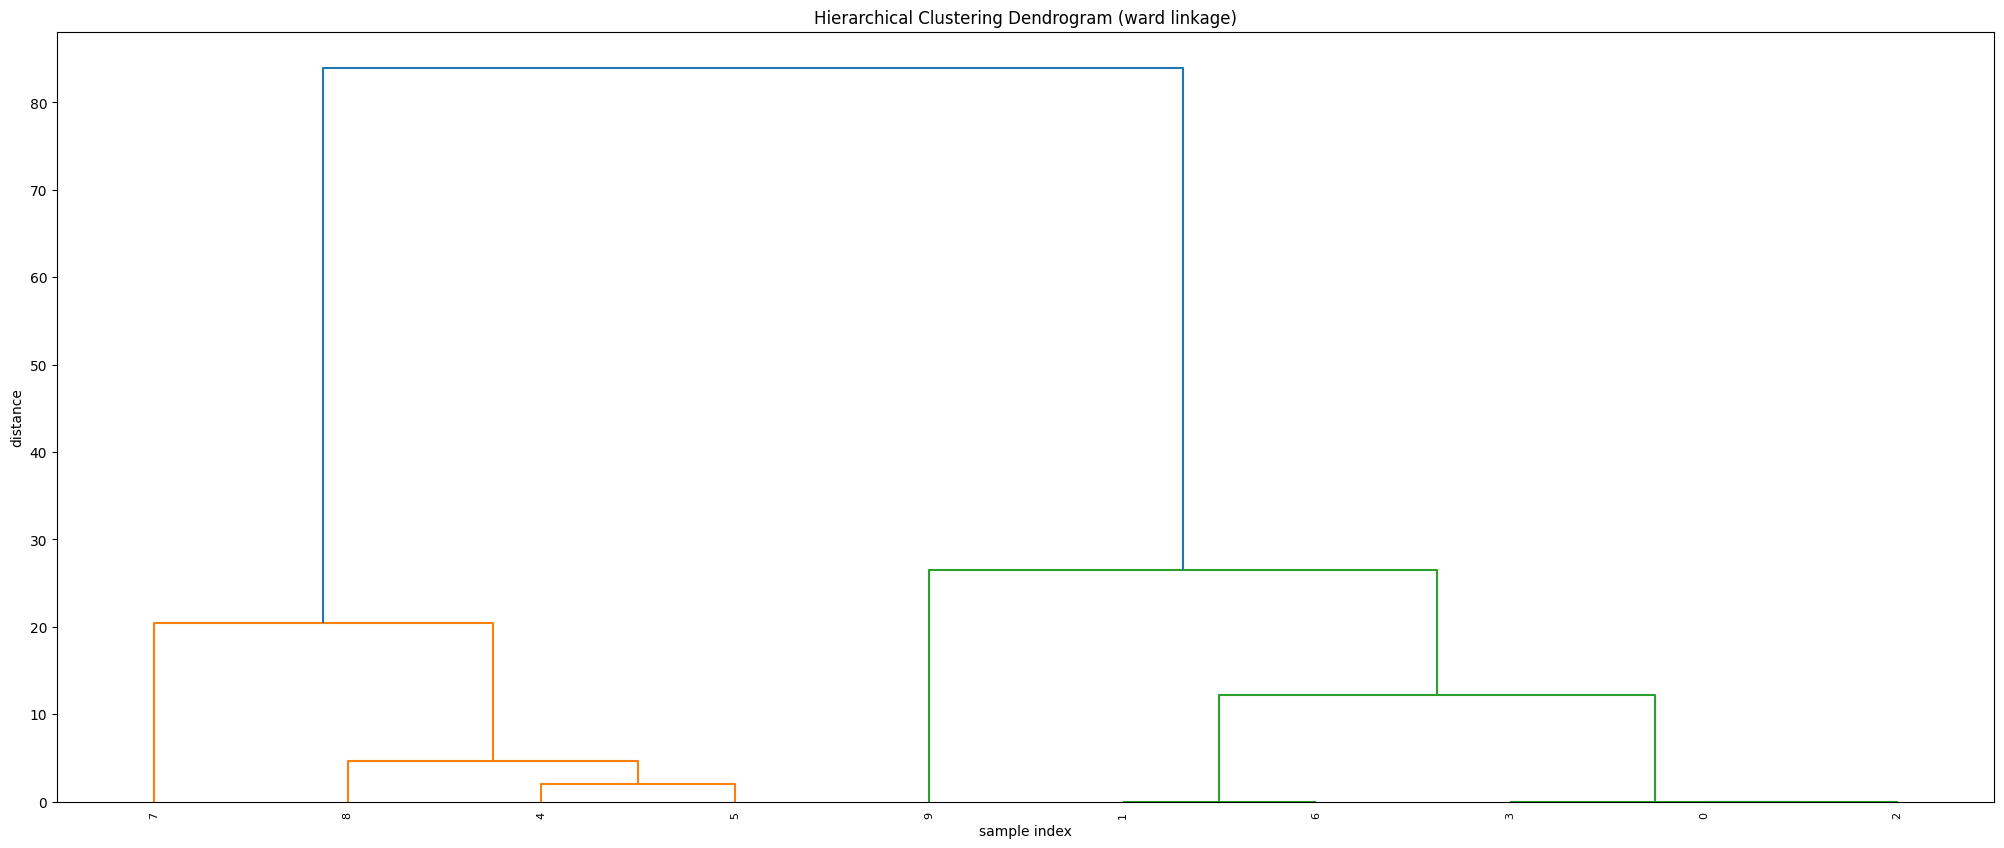

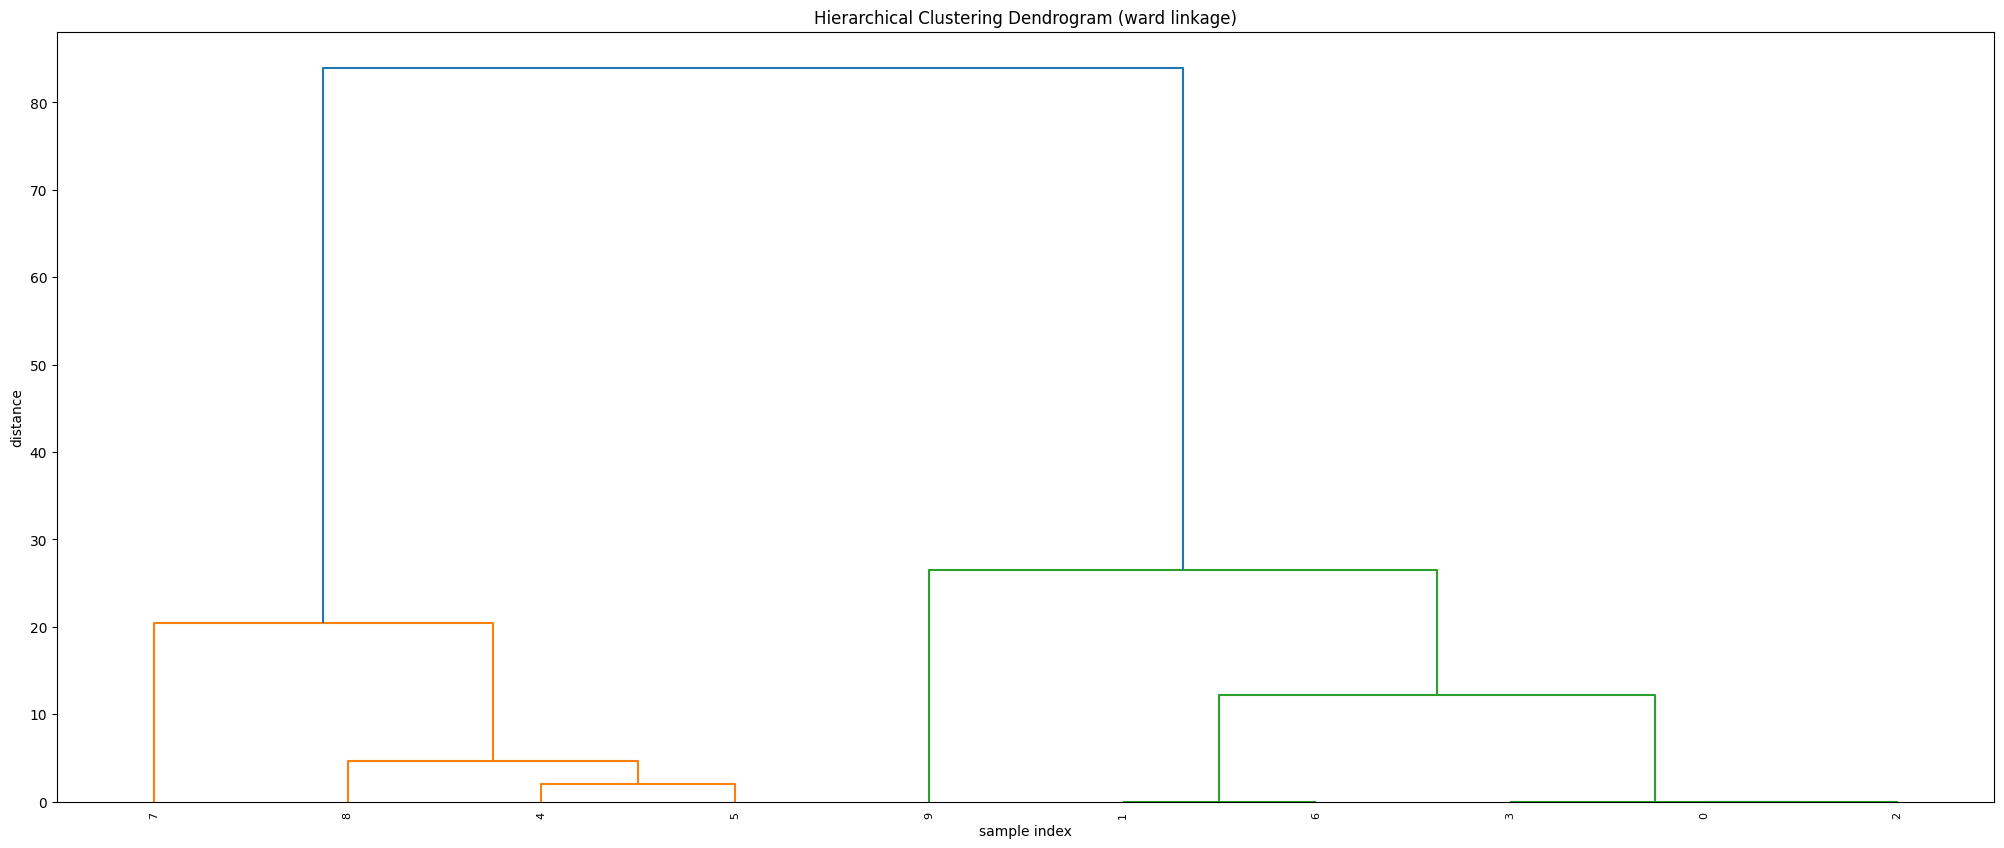

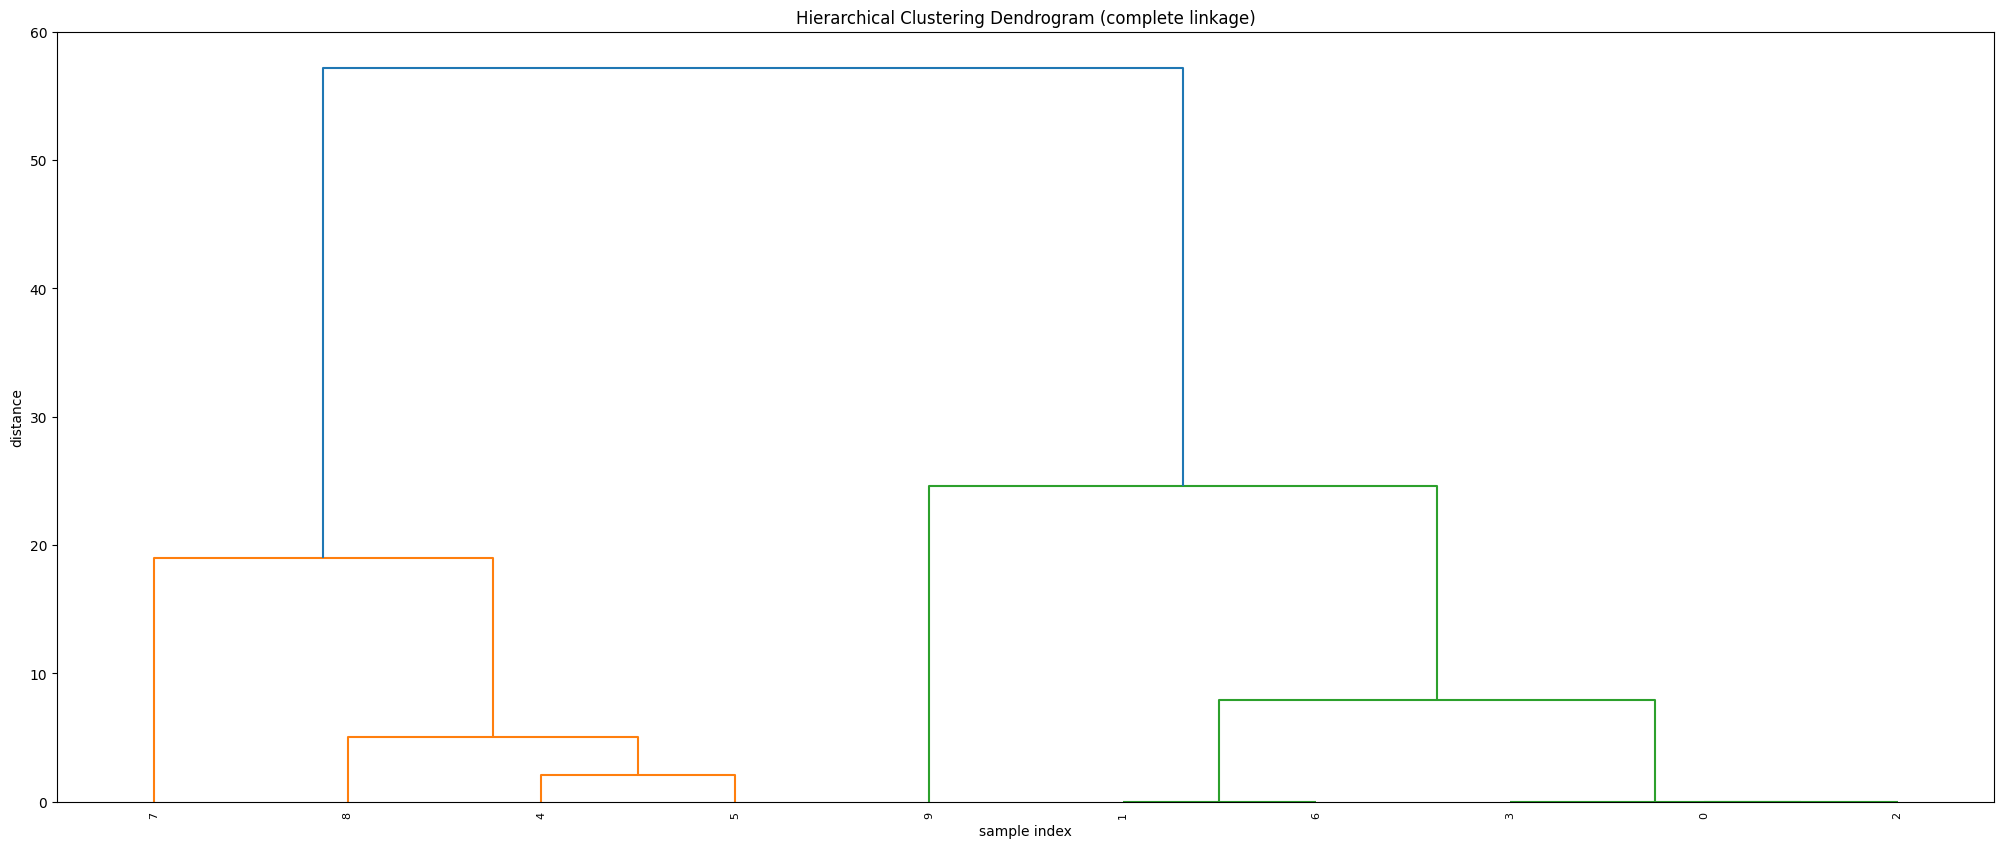

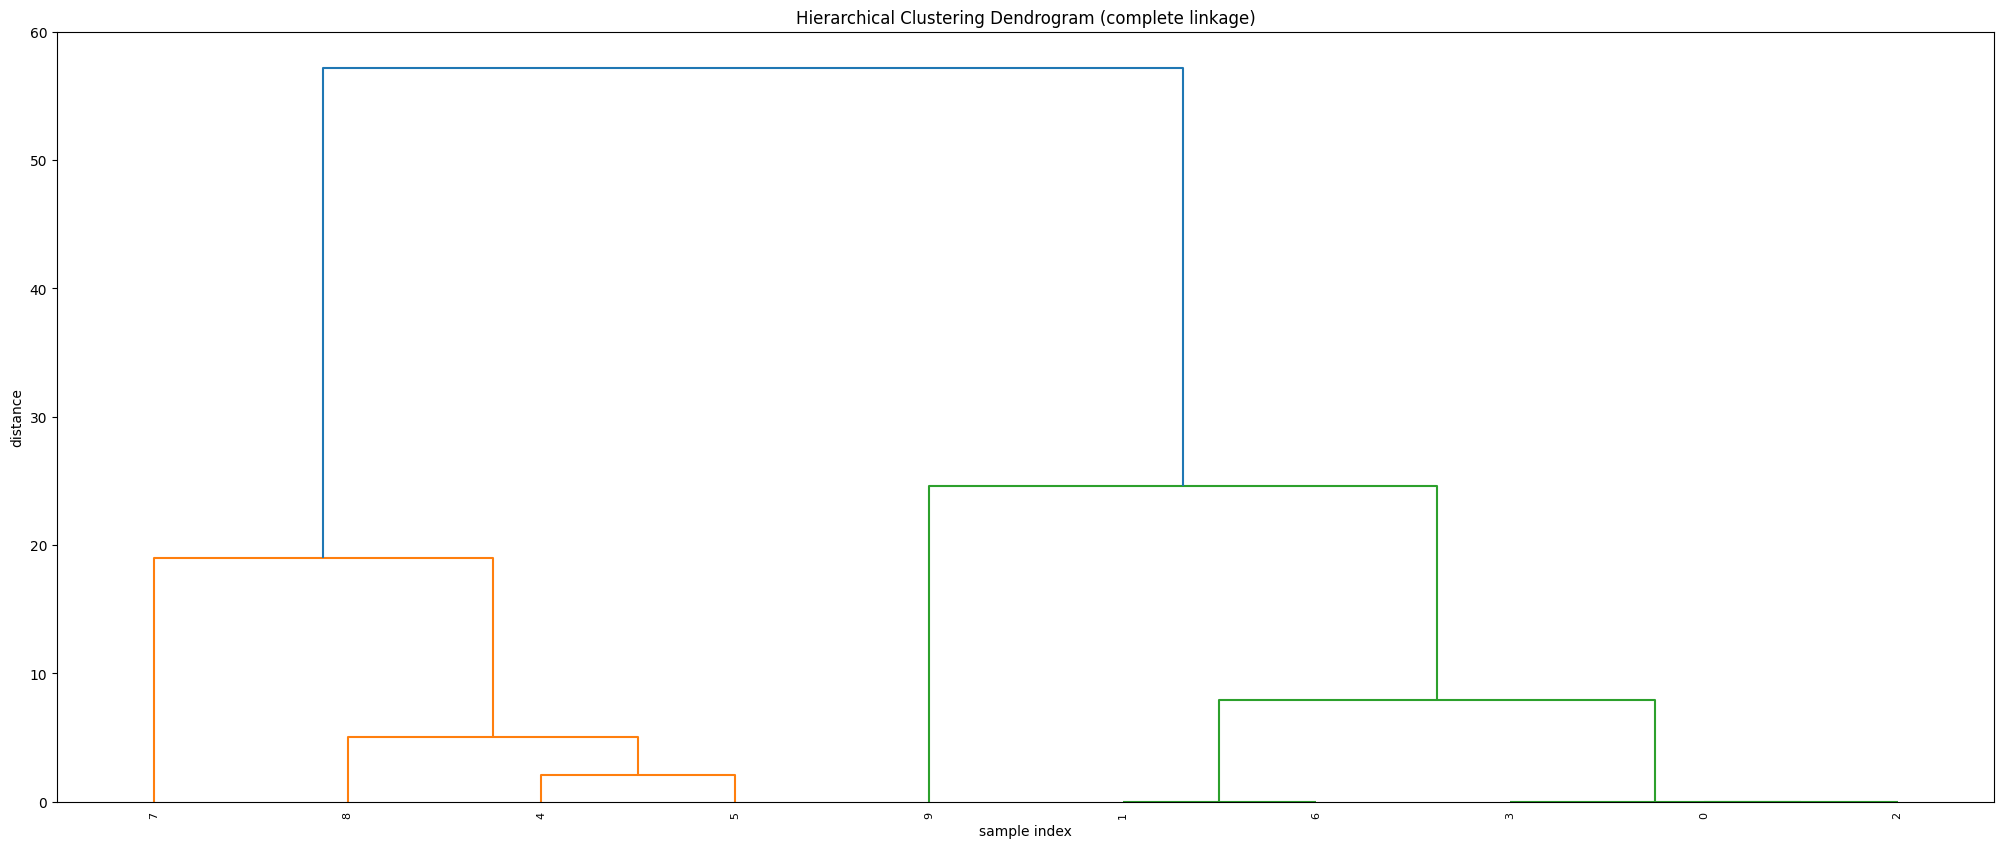

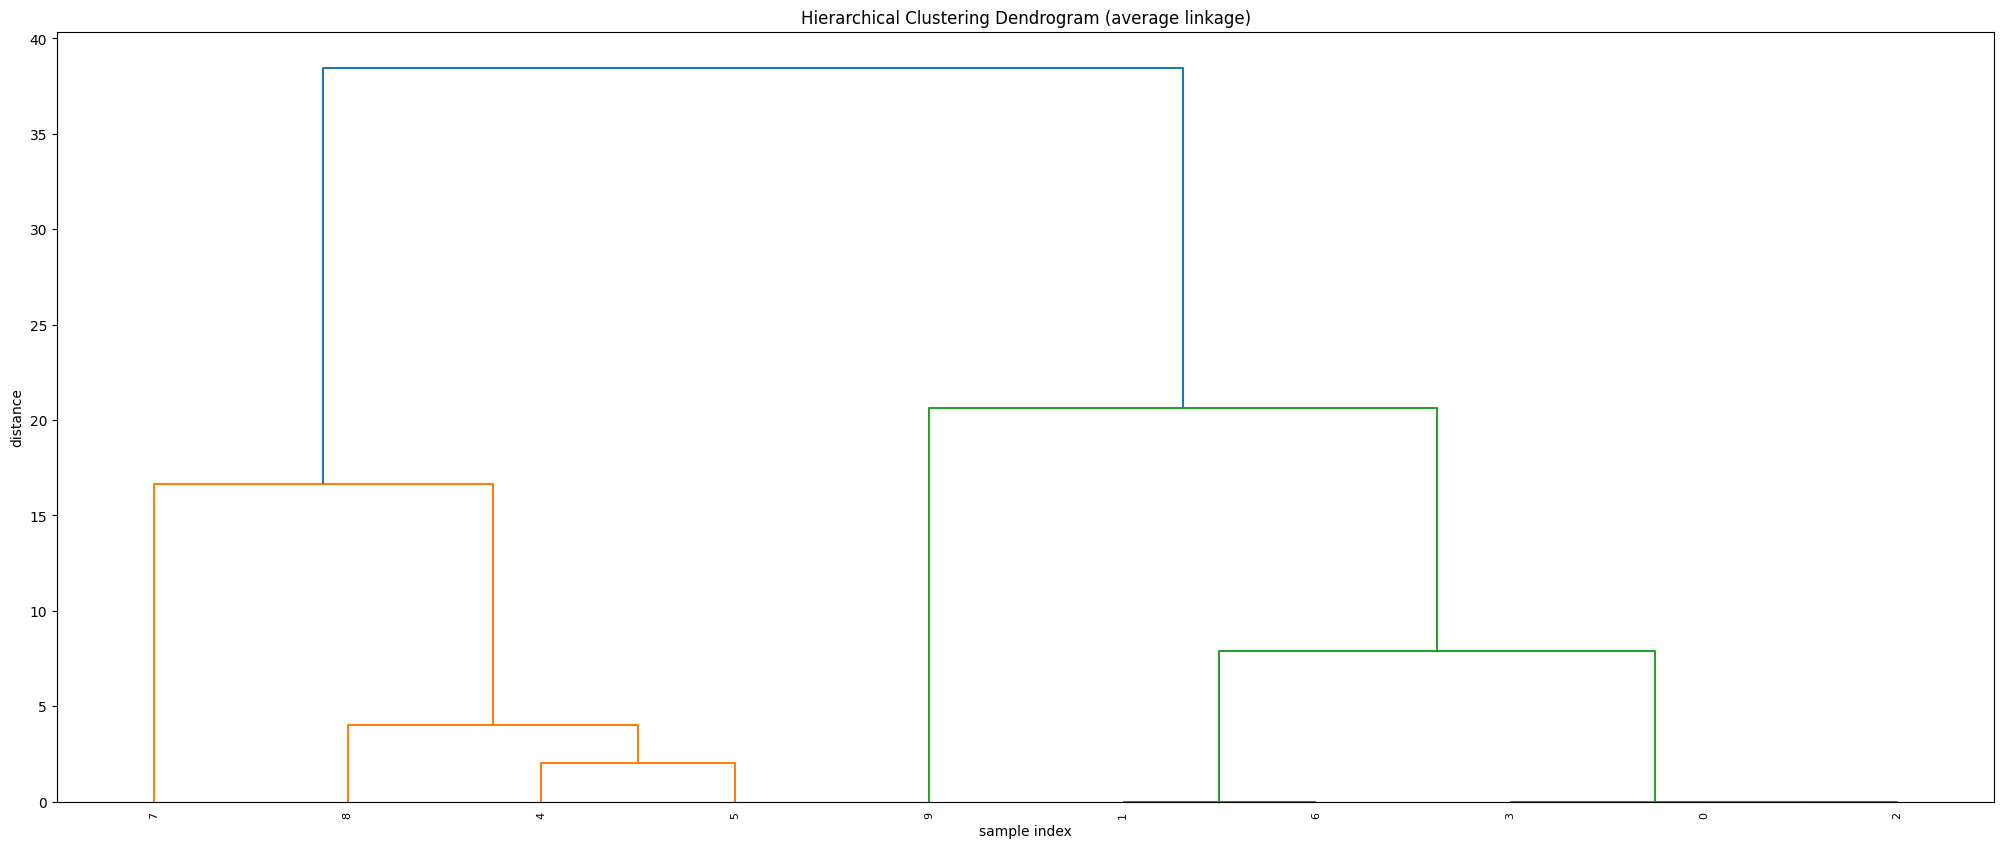

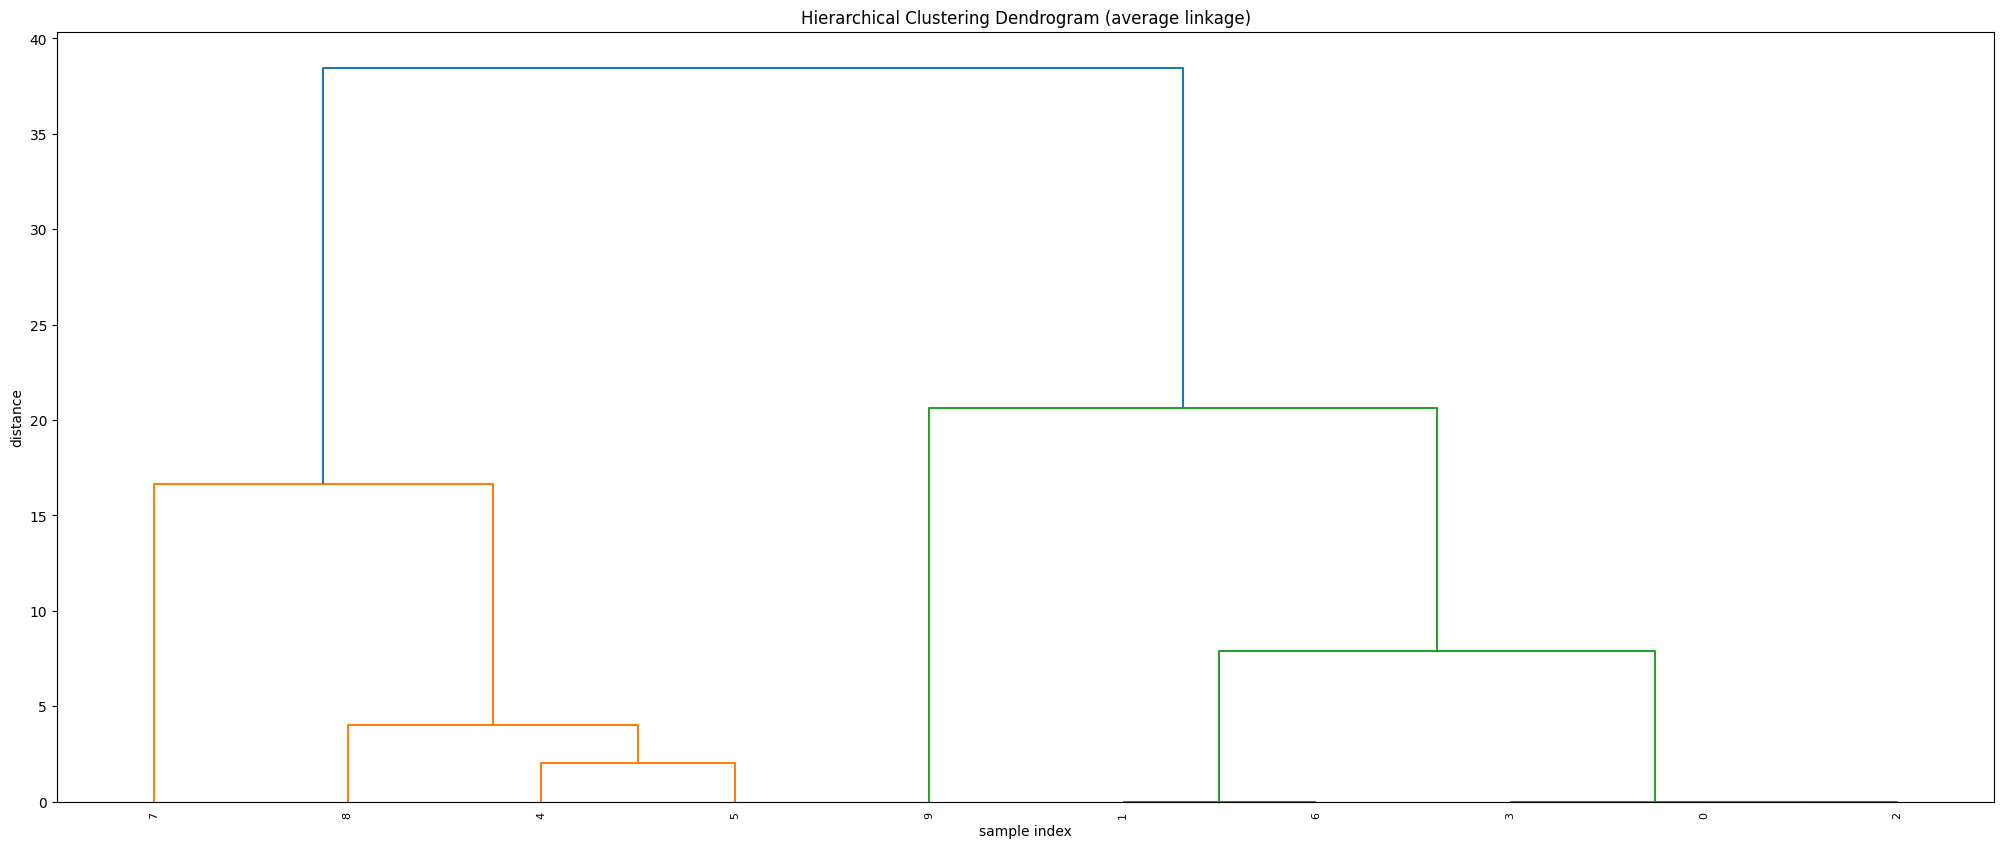

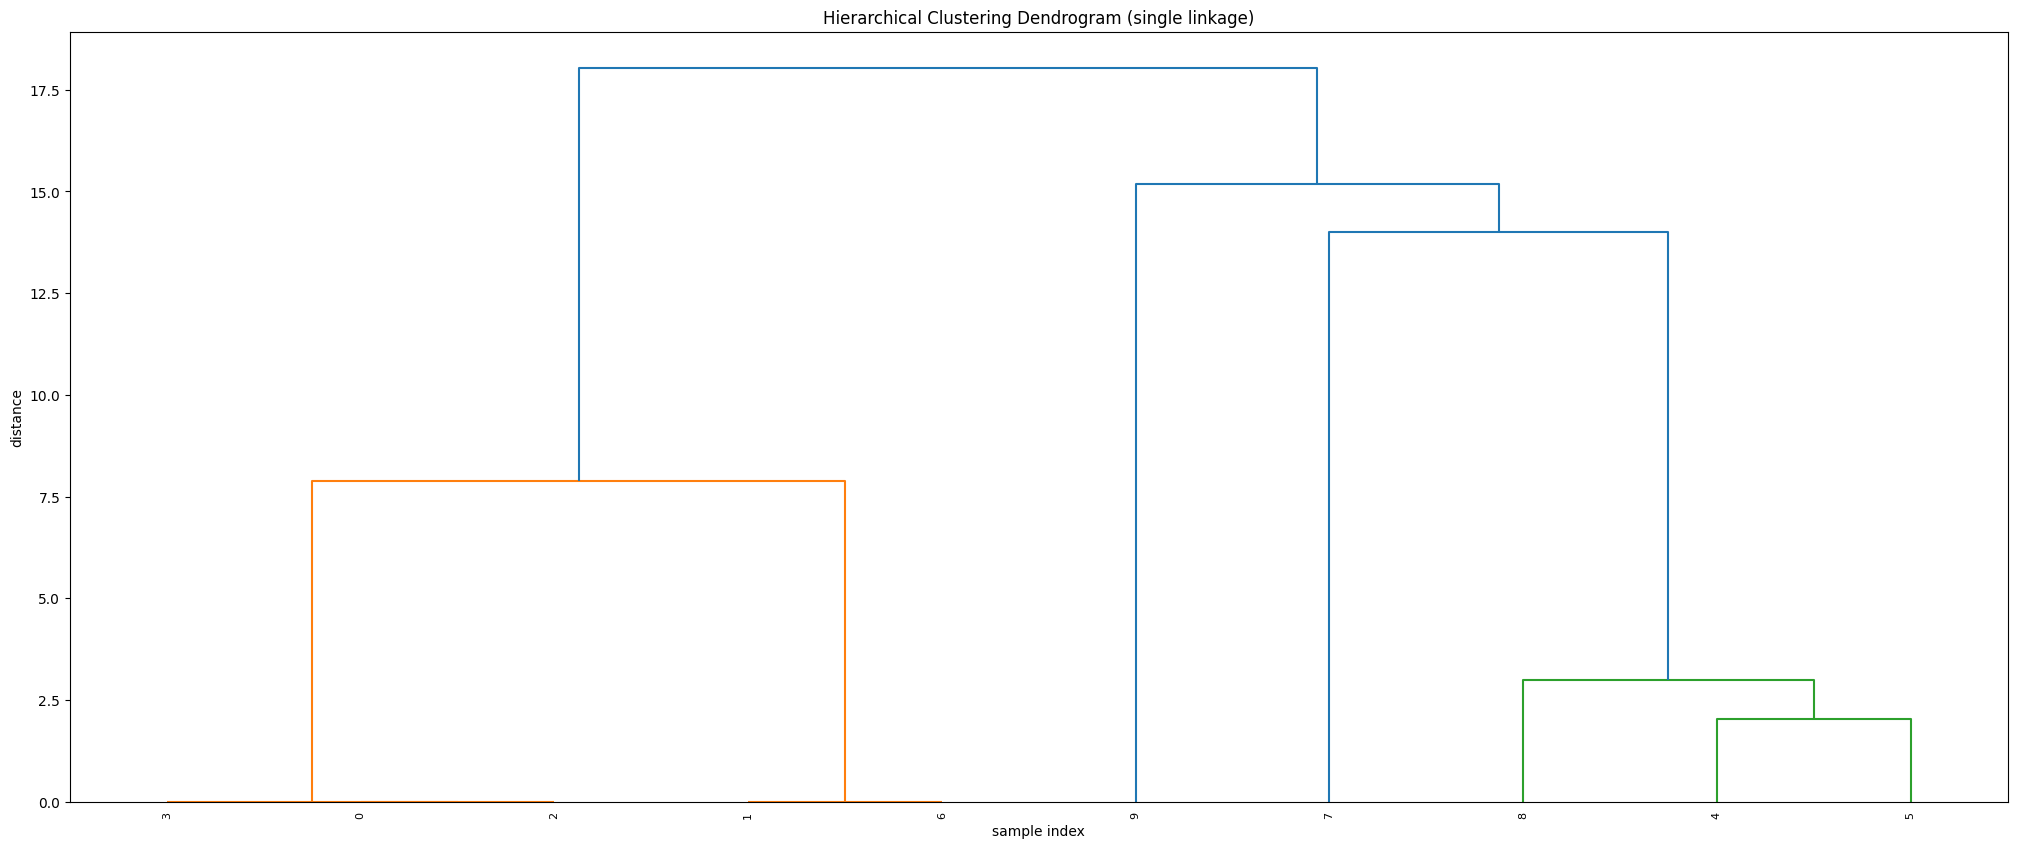

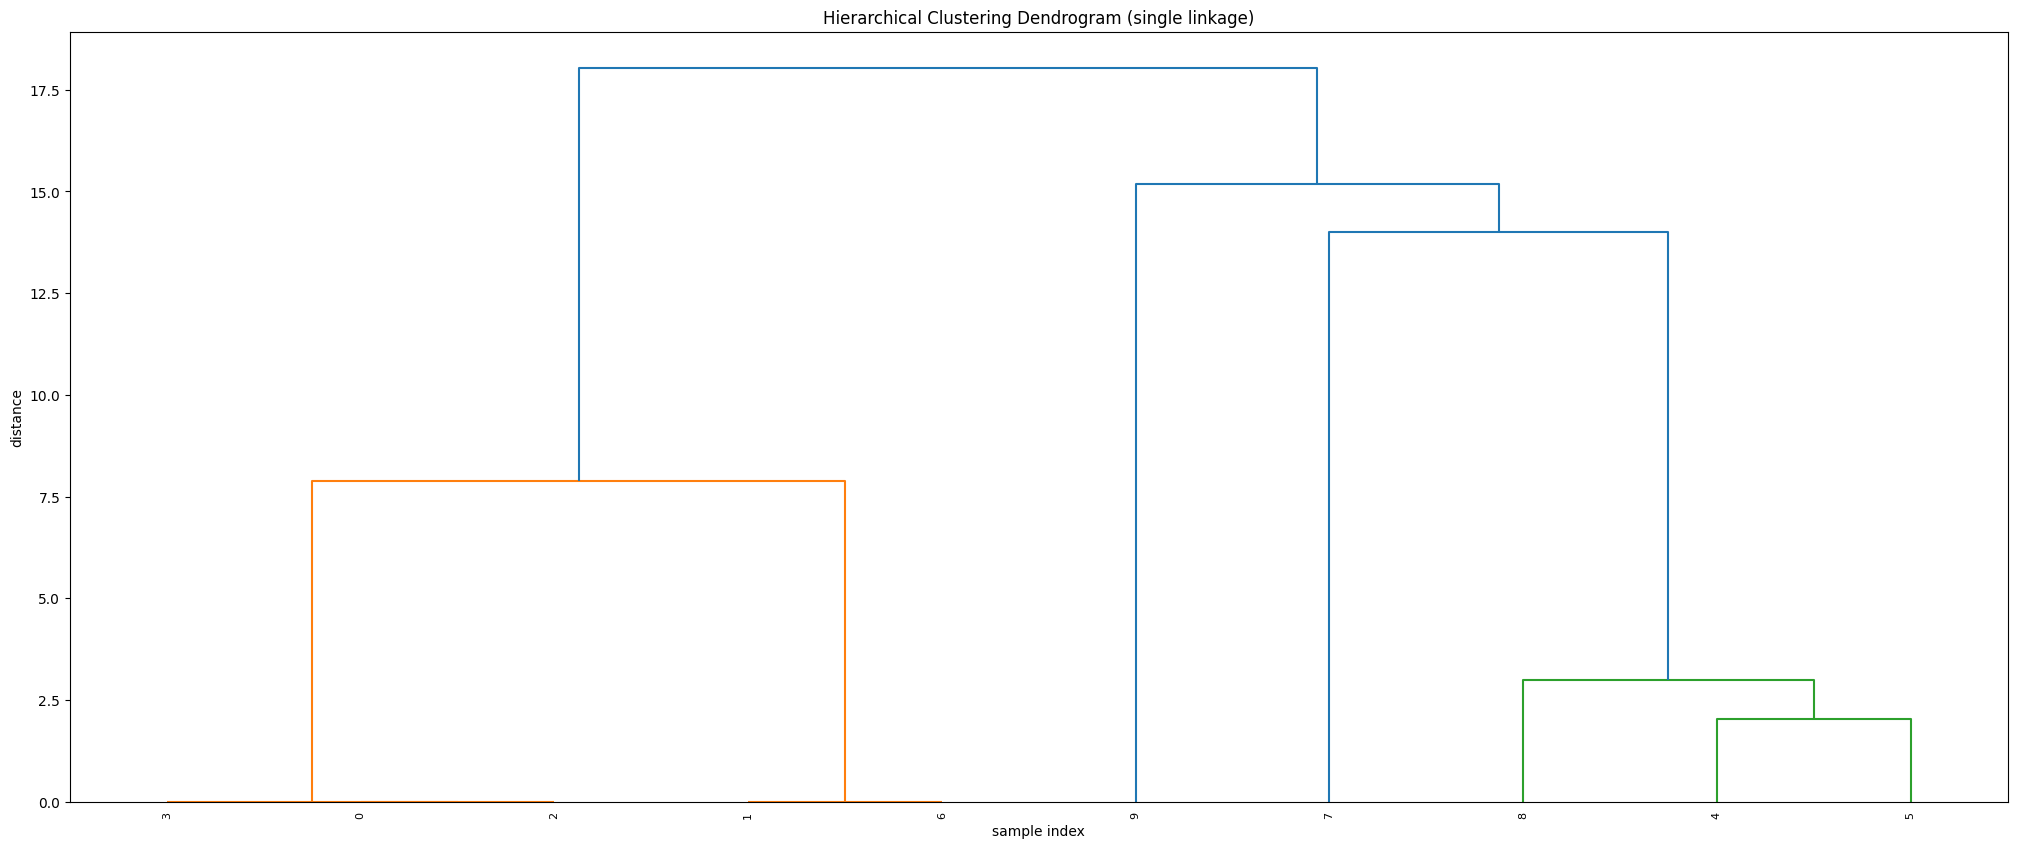

In [305]:
linkage_types = ['ward', 'complete', 'average', 'single']
for link_type in linkage_types:
    Z = linkage(d[:10], link_type)

    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({link_type} linkage)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
    plt.show()

    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({link_type} linkage)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp')
    plt.show()

In [306]:
features = ['RMR', 'Модул на деформации D']
d = data[features].values

In [307]:
num_clusters = 2
ac = AgglomerativeClustering(n_clusters=num_clusters)
labels = ac.fit_predict(d)

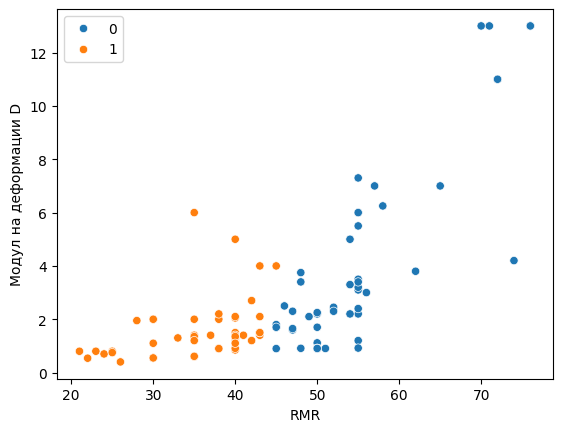

In [308]:
sns.scatterplot(x=data['RMR'], y=data['Модул на деформации D'], hue=labels)
plt.show()

In [309]:
features = ['Индекс на квалитет Q', 'Модул на деформации D']
d = data[features].values

In [310]:
num_clusters = 2
ac = AgglomerativeClustering(n_clusters=num_clusters)
labels = ac.fit_predict(d)

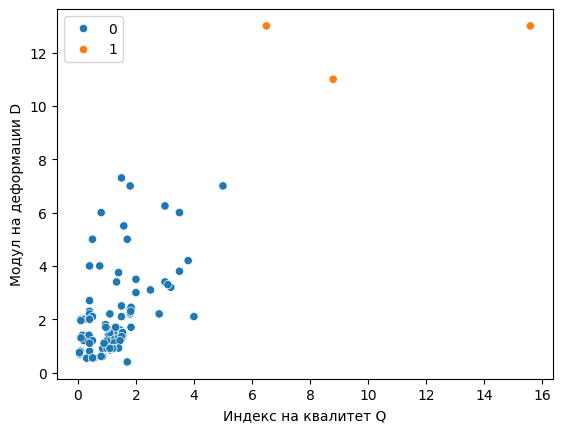

In [311]:
sns.scatterplot(x=data['Индекс на квалитет Q'], y=data['Модул на деформации D'], hue=labels)
plt.show()

## DBSCAN

DBSCAN identifies clusters based on data point density. It groups together points in high-density regions, separated by areas of lower point density, effectively discovering clusters of arbitrary shapes. It's robust against noise and doesn't require specifying the number of clusters in advance. However, sensitivity to parameter settings and difficulties with varying density levels are considerations.

In [312]:
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(data)

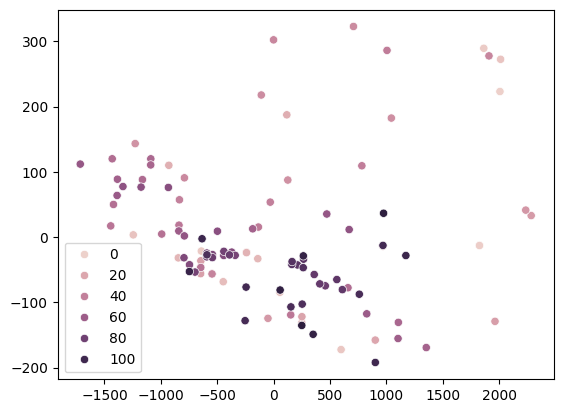

In [313]:
db = DBSCAN(eps=0.1, min_samples=1).fit(X_pca)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db.labels_)
plt.show()

Кластерирањето со DBSCAN не дава воопшто добри резултати

# Адресирање и решавање на потенцијални проблеми

Како потенцијален проблем кој што би го адресирал и решил е правилниот избор на карактеристики (**feature selection**) на податочното множество. Во овој процес на селекција на карактеристики, нашата цел е да ги подобриме предвидливите перформанси на нашиот модел преку идентификување и задржување на највлијателните карактеристики од податочното множество. Го користиме методот **SelectKBest**, кој ја проценува релевантноста на секоја карактеристика користејќи F-regression score. Преку пристап со **cross-validation**, итеративно правиме проценка од карактеристиките на кандидатите (k) за да го одредиме оптималниот број што ја минимизира средната квадратна грешка. Избраните карактеристики потоа се користат за да се обучи **RandomForestRegressor** модел. Оваа методологија гарантира дека нашиот модел работи со најрелевантните карактеристики, оптимизирајќи ја неговата способност да генерализира и прави точни предвидувања на податоците.

In [326]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [327]:
# Target column - RMR
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['RMR'], test_size=0.2)

In [336]:
X = data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR'])
k_values = np.arange(1, min(X.shape[1], 20))

cv_scores = []

In [329]:
for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)

    model = RandomForestRegressor(random_state=42)

    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))

optimal_k = k_values[np.argmin(cv_scores)]

print("Optimal k:", optimal_k)

Optimal k: 5


In [330]:
selector = SelectKBest(score_func=f_regression, k=optimal_k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [331]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

In [335]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Squared Error (MSE): 15.903894507575744
R-squared (R2) Score: 0.9116663230664479
Mean Absolute Error (MAE):  3.3509848484848472


In [381]:
# Target column - Индекс на квалитет Q
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Индекс на квалитет Q'], test_size=0.2)

In [382]:
X = data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR'])
k_values = np.arange(1, min(X.shape[1], 20))

cv_scores = []

In [383]:
for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)

    model = RandomForestRegressor(random_state=42)

    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))

optimal_k = k_values[np.argmin(cv_scores)]

print("Optimal k:", optimal_k)

Optimal k: 7


In [384]:
selector = SelectKBest(score_func=f_regression, k=optimal_k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [385]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

In [386]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Squared Error (MSE): 0.3498578047636371
R-squared (R2) Score: 0.884664132092193
Mean Absolute Error (MAE):  0.4149363636363639


In [387]:
# Target column - Модул на деформации D
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR']), data['Модул на деформации D'], test_size=0.2)

In [388]:
X = data.drop(columns=['Модул на деформации D', 'Индекс на квалитет Q', 'RMR'])
k_values = np.arange(1, min(X.shape[1], 20))

cv_scores = []

In [389]:
for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)

    model = RandomForestRegressor(random_state=42)

    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))

optimal_k = k_values[np.argmin(cv_scores)]

print("Optimal k:", optimal_k)

Optimal k: 5


In [390]:
selector = SelectKBest(score_func=f_regression, k=optimal_k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [391]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

In [392]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Squared Error (MSE): 0.926075569659092
R-squared (R2) Score: 0.8772282151656992
Mean Absolute Error (MAE):  0.6856840909090912


# Имплементација на пристапи од научни трудови

[1] https://ieeexplore.ieee.org/abstract/document/8610148

[2] https://www.sciencedirect.com/science/article/abs/pii/S0925231217311815

[3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4466856/

[4] https://link.springer.com/article/10.1023/a:1007670802811

[5] https://link.springer.com/chapter/10.1007/978-3-540-39964-3_62
